# "Unlocking Potential: A Comprehensive Analysis and Strategy for Colibri Wireless"

Trivisio is committed to elevating the Colibri Wireless unit's excellence in physical activity monitoring. Authored as a member of the data scientist team, this report delves into data collected from nine participants using the Colibri Wireless device during various physical activities.

The report is structured around four key components:

1. **Data Cleaning and Wrangling:** Ensuring data integrity by addressing outliers and missing values.
2. **Data Exploration (EDA):** Understanding dataset intricacies, uncovering key statistics, and visualizing trends.
3. **Building a Model:** Developing and rigorously testing at least one model.
4. **Recommendations:** Proposing data-driven suggestions to maximize the Colibri Wireless unit's potential.

This concise research aims to transform data into actionable plans, propelling our product to new heights. Each component is streamlined for clarity and ease of understanding.

#### Before moving towards each component there are some pre-requisite steps we need to perform



### STEP 1: Importing the necessary libraries

Based on requirement, will import more libraries throughout our analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn import metrics
import itertools
import warnings

### STEP 2: Defining the column names 

In [2]:
column_names=['timestamp-sec','activity_ID', 'heart-rate-(bpm)','hand-temp', 
              'hand-3D-acc ±16g,13-bit-1','hand-3D-acc ±16g,13-bit-2','hand-3D-acc ±16g,13-bit-3', 
              'hand-3D-acc ±6g,13-bit-1', 'hand-3D-acc ±6g,13-bit-2','hand-3D-acc ±6g,13-bit-3',
              'hand-3D-gyro-1','hand-3D-gyro-2','hand-3D-gyro-3','hand-3D-magneto-1',
              'hand-3D-magneto-2','hand-3D-magneto-3','hand-orientation-1',
              'hand-orientation-2','hand-orientation-3','hand-orientation-4','chest-temp', 
              'chest-3D-acc ±16g,13-bit-1','chest-3D-acc ±16g,13-bit-2','chest-3D-acc ±16g,13-bit-3',
              'chest-3D-acc ±6g,13-bit-1', 'chest-3D-acc ±6g,13-bit-2','chest-3D-acc ±6g,13-bit-3',
              'chest-3D-gyro-1','chest-3D-gyro-2','chest-3D-gyro-3','chest-3D-magneto-1',
              'chest-3D-magneto-2','chest-3D-magneto-3','chest-orientation-1',
              'chest-orientation-2','chest-orientation-3','chest-orientation-4','ankle-temp', 
              'ankle-3D-acc ±16g,13-bit-1','ankle-3D-acc ±16g,13-bit-2','ankle-3D-acc ±16g,13-bit-3', 
              'ankle-3D-acc ±6g,13-bit-1', 'ankle-3D-acc ±6g,13-bit-2','ankle-3D-acc ±6g,13-bit-3',
              'ankle-3D-gyro-1','ankle-3D-gyro-2','ankle-3D-gyro-3','ankle-3D-magneto-1',
              'ankle-3D-magneto-2','ankle-3D-magneto-3','ankle-orientation-1',
              'ankle-orientation-2','ankle-orientation-3','ankle-orientation-4']

Based on the dataset, we've created a variable—a list of category names representing the collected data.

### STEP 3: Importing the Data

In [3]:
df=pd.DataFrame(columns=column_names) #Defining df as a dataFrame having column names as defined in the variable above
df.insert(loc=0,column='subject_ID',value="") #Defining additional column to link the data to their respondant

for i in np.arange(1,10,1):
    df1=pd.read_csv(fr"C:\Users\Syed.SYED-MOHSIN-ALI\Desktop\assignment\Dataset\Protocol\subject1{i:0>2d}.dat",names=column_names,delimiter=" ")
    df1.insert(loc=0,column='subject_ID',value=f"1{i:0>2d}")
    df=pd.concat([df,df1],ignore_index=True)
    del df1

With nine participants in the large dataset, submitting each dataset separately and then combining them is challenging. Utilized a loop to retrieve and append each dataset file to the main dataframe.

### STEP 4: Importing additional Data of Optional Activities

In [4]:
optional = [101,105,106,108,109] # Ids of the subjects who had done additional activities
for i in optional:
    df1=pd.read_csv(fr"C:\Users\Syed.SYED-MOHSIN-ALI\Desktop\assignment\Dataset\Optional\subject{i}.dat",names=column_names,delimiter=" ")
    df1.insert(loc=0,column='subject_ID',value=f"{i}")
    df=pd.concat([df,df1],ignore_index=True)
    del df1

Merged data from five additional activities with the main dataset to broaden activity scope, acknowledging reduced data due to fewer participants. Aiming for a different analysis approach.

# PART A : Data Cleaning and Wrangling

### STEP 1: Having an overview of the data

In [5]:
display(df)

,subject_ID,timestamp-sec,activity_ID,heart-rate-(bpm),hand-temp,"hand-3D-acc ±16g,13-bit-1","hand-3D-acc ±16g,13-bit-2","hand-3D-acc ±16g,13-bit-3","hand-3D-acc ±6g,13-bit-1","hand-3D-acc ±6g,13-bit-2",...,ankle-3D-gyro-1,ankle-3D-gyro-2,ankle-3D-gyro-3,ankle-3D-magneto-1,ankle-3D-magneto-2,ankle-3D-magneto-3,ankle-orientation-1,ankle-orientation-2,ankle-orientation-3,ankle-orientation-4
0,101,8.38,0,104.0,30.000,2.37223,8.60074,3.51048,2.43954,8.76165,...,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.000000,0.000000,0.000000,0.000000
1,101,8.39,0,NaN,30.000,2.18837,8.56560,3.66179,2.39494,8.55081,...,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.000000,0.000000,0.000000,0.000000
2,101,8.40,0,NaN,30.000,2.37357,8.60107,3.54898,2.30514,8.53644,...,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.000000,0.000000,0.000000,0.000000
3,101,8.41,0,NaN,30.000,2.07473,8.52853,3.66021,2.33528,8.53622,...,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.000000,0.000000,0.000000,0.000000
4,101,8.42,0,NaN,30.000,2.22936,8.83122,3.70000,2.23055,8.59741,...,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850500,109,1940.78,0,NaN,24.875,-6.51915,6.87682,2.34395,-6.67159,6.87843,...,-0.040479,0.028883,-0.016737,-40.1550,-18.4177,25.3998,0.276396,-0.692785,0.412759,-0.522766
3850501,109,1940.79,0,NaN,24.875,-6.47548,6.95375,2.49829,-6.71706,6.87873,...,-0.005168,0.040632,-0.015746,-39.7605,-18.8227,25.6854,0.276461,-0.692737,0.412749,-0.522804
3850502,109,1940.80,0,NaN,24.875,-6.58698,6.84148,2.57398,-6.79405,6.81875,...,0.022185,0.068296,0.001916,-39.3718,-19.0996,25.6871,0.276468,-0.692669,0.412555,-0.523042
3850503,109,1940.81,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.005940,-0.011902,0.006604,-39.5070,-18.9654,25.2609,0.276608,-0.692688,0.412525,-0.522966


In [8]:
df.isnull().sum()

subject_ID                          0
timestamp-sec                       0
activity_ID                         0
heart-rate-(bpm)              3498952
hand-temp                       14338
hand-3D-acc ±16g,13-bit-1       14338
hand-3D-acc ±16g,13-bit-2       14338
hand-3D-acc ±16g,13-bit-3       14338
hand-3D-acc ±6g,13-bit-1        14338
hand-3D-acc ±6g,13-bit-2        14338
hand-3D-acc ±6g,13-bit-3        14338
hand-3D-gyro-1                  14338
hand-3D-gyro-2                  14338
hand-3D-gyro-3                  14338
hand-3D-magneto-1               14338
hand-3D-magneto-2               14338
hand-3D-magneto-3               14338
hand-orientation-1              14338
hand-orientation-2              14338
hand-orientation-3              14338
hand-orientation-4              14338
chest-temp                       4310
chest-3D-acc ±16g,13-bit-1       4310
chest-3D-acc ±16g,13-bit-2       4310
chest-3D-acc ±16g,13-bit-3       4310
chest-3D-acc ±6g,13-bit-1        4310
chest-3D-acc

In [5]:
df['activity_ID'] = df['activity_ID'].astype(int) #will be used as numerical value in further analysis 
print((df['activity_ID']==0).sum())

1125552


### Observations from the data


1. 3850505 rows × 55 columns
2. There are 12 orientation columns which are redundant in our analysis as per the data provider
3. There are 9 columns of accelerometer (sensitive to resolution of ±6g) readings, which have poor precision as per the data provider which makes them redundant columns in our data set
4. Under the activity ID column there are 1125552 zeros ( i.e 29% of the data) which is the transition time between activities as per the data provider which makes them redundant rows 
5. 14338 NAN Values in IMU sensor readings placed on hand (i.e 0.37% of the data)
6. 4310 NAN values in IMU sensor readings placed on chest( i.e 0.1% of the data)
7. 13556 NAN values in the IMU sensor readings placed on the ankle (i.e 0.35% of the data )
8. 3498952 NAN values in the sensor that recorded the heart rate (i.e 90.8% of the data) 

### STEP 2: Removing NAN's and redundant columns

#### Deleting rows where the activity ID is zero (transition time).

In [6]:
df= df[df['activity_ID'] != 0]
df.shape

(2724953, 55)

Since activity ID = 0 denotes the transition period between one activity and another according to the data provider, we eliminated 1125552 rows from the data, leaving us with 2724953 rows.

#### Removing the redundant columns 

In [7]:
invalid_columns = [col for col in df.columns if 'orientation' in col or '±6g' in col]
df = df.drop(columns=invalid_columns)
df.shape

(2724953, 34)

Removed 12 orientation columns and 9 accelerometer columns (sensitivity 6 grams) due to poor precision, following the data provider's guidance. Result: 34 remaining columns.

#### Removing the NAN's but excluding the heart-rate-(bpm)

In [8]:
exclude = 'heart-rate-(bpm)'
df= df.dropna(subset=df.columns.difference([exclude]))
df.shape

(2701010, 34)

Removed 0.62% (23943 rows) with NAN values. The IMU and heart rate monitor were out of sync due to the latter's lower precision (collected data nine times per second, compared to IMU sensors' 100 times). To maintain data size, we filled missing heart rate data, assuming minimal variation in short time intervals. Result: a uniform-sized sample for a more comprehensive study.

In [14]:
df.isna().sum()

subject_ID                          0
timestamp-sec                       0
activity_ID                         0
heart-rate-(bpm)              2454298
hand-temp                           0
hand-3D-acc ±16g,13-bit-1           0
hand-3D-acc ±16g,13-bit-2           0
hand-3D-acc ±16g,13-bit-3           0
hand-3D-gyro-1                      0
hand-3D-gyro-2                      0
hand-3D-gyro-3                      0
hand-3D-magneto-1                   0
hand-3D-magneto-2                   0
hand-3D-magneto-3                   0
chest-temp                          0
chest-3D-acc ±16g,13-bit-1          0
chest-3D-acc ±16g,13-bit-2          0
chest-3D-acc ±16g,13-bit-3          0
chest-3D-gyro-1                     0
chest-3D-gyro-2                     0
chest-3D-gyro-3                     0
chest-3D-magneto-1                  0
chest-3D-magneto-2                  0
chest-3D-magneto-3                  0
ankle-temp                          0
ankle-3D-acc ±16g,13-bit-1          0
ankle-3D-acc

Eliminated NANs from other columns, leaving only heart-rate-(bpm) NANs.

#### Using backward filling method to fill the NAN values of heart-rate-(bpm)

In [9]:
df.loc[:, "heart-rate-(bpm)"] = df["heart-rate-(bpm)"].fillna(method='bfill')
df["heart-rate-(bpm)"].isna().sum()

7

Backward filling method used to substitute 2,454,291 NAN values under heart-rate (bpm), resulting in only 7 NAN values remaining, which can now be eliminated.

In [10]:
df=df.dropna(subset = ["heart-rate-(bpm)"])
df["heart-rate-(bpm)"].isna().sum()

0

We have now successfully eliminated every NAN from the dataset. 

### STEP 3: Adding columns that would be useful for analysis

#### calculating and adding magnitude of  each sensor as a seperate column in df

In [117]:
df['hand-acc-mag'] = df.apply(lambda row: (row['hand-3D-acc ±16g,13-bit-1']**2 + row['hand-3D-acc ±16g,13-bit-2']**2 + row['hand-3D-acc ±16g,13-bit-3']**2)**0.5, axis=1)
df['hand-magneto-mag'] = df.apply(lambda row: (row['hand-3D-magneto-1']**2 + row['hand-3D-magneto-2']**2 + row['hand-3D-magneto-3']**2)**0.5, axis=1)
df['hand-gyro-mag'] = df.apply(lambda row: (row['hand-3D-gyro-1']**2 + row['hand-3D-gyro-2']**2 + row['hand-3D-gyro-3']**2)**0.5, axis=1)

df['chest-acc-mag'] = df.apply(lambda row: (row['chest-3D-acc ±16g,13-bit-1']**2 + row['chest-3D-acc ±16g,13-bit-2']**2 + row['chest-3D-acc ±16g,13-bit-3']**2)**0.5, axis=1)
df['chest-magneto-mag'] = df.apply(lambda row: (row['chest-3D-magneto-1']**2 + row['chest-3D-magneto-2']**2 + row['chest-3D-magneto-3']**2)**0.5, axis=1)
df['chest-gyro-mag'] = df.apply(lambda row: (row['chest-3D-gyro-1']**2 + row['chest-3D-gyro-2']**2 + row['chest-3D-gyro-3']**2)**0.5, axis=1)

df['ankle-acc-mag'] = df.apply(lambda row: (row['ankle-3D-acc ±16g,13-bit-1']**2 + row['ankle-3D-acc ±16g,13-bit-2']**2 + row['ankle-3D-acc ±16g,13-bit-3']**2)**0.5, axis=1)
df['ankle-magneto-mag'] = df.apply(lambda row: (row['ankle-3D-magneto-1']**2 + row['ankle-3D-magneto-2']**2 + row['ankle-3D-magneto-3']**2)**0.5, axis=1)
df['ankle-gyro-mag'] = df.apply(lambda row: (row['ankle-3D-gyro-1']**2 + row['ankle-3D-gyro-2']**2 + row['ankle-3D-gyro-3']**2)**0.5, axis=1)


Opted to include separate columns for accelerometer, magnetometer, and gyroscope magnitudes for the three IMUs (hand, chest, and ankle). Calculated magnitudes using below formula for Bit-1, Bit-2, and Bit-3 representing sensor axes in the data
$\text{Magnitude} = \sqrt{X^2 + Y^2 + Z^2}$

This could be helpful

#### Mapping names of activity to each activity ID and adding as a seperate column

In [20]:
activity_names={1: 'lying', 2: 'sitting', 3: 'standing', 4: 'walking', 5: 'running', 6: 'cycling', 7: 'Nordic walking', 9: 'watching TV', 10: 'computer work', 11: 'car driving', 12: 'ascending stairs', 13: 'descending stairs', 16: 'vacuum cleaning', 17: 'ironing', 18: 'folding laundry', 19: 'house cleaning', 20: 'playing soccer', 24: 'rope jumping', 0: 'other (transient activities)'}
activity_mapped=df['activity_ID'].map(activity_names)
df.insert(loc=2,column='activity',value=activity_mapped)

In addition to the activity ID, a new column has been added with the name of the activity the subject completed.

#### Mapping each activity's MET score based on the subject's BMI and adding as a seperate column

In [ ]:
# Information of each subject provided by the data provider
subject_info=pd.DataFrame(data=[[101,'Male',27,182,83,75,193,'right'],[102,'Female',25,169,78,74,195,'right'],
                                [103,'Male',31,187,92,68,189,'right'],[104,'Male',24,194,95,58,196,'right'],
                                [105,'Male',26,180,73,70,194,'right'],[106,'Male',26,183,69,60,194,'right'],
                                [107,'Male',23,173,86,60,197,'right'],[108,'Male',32,179,87,66,188,'left'],
                                [109,'Male',31,168,65,54,189,'right']],
                          columns=['subject_ID','Sex','Age_(years)','Height_(cm)','Weight_(kg)','Resting HR_(bpm)',
                                   'Max_HR_(bpm)','Dominant_hand'])

#calculating the BMI of each subject 
subject_info['BMI'] = round(subject_info['Weight_(kg)'] / ((subject_info['Height_(cm)'] / 100) ** 2), 3)

#Extracting the BMI and Subject ID in a seperate dictionary
subject_BMI=dict(zip(subject_info['subject_ID'],subject_info['BMI']))

# Information of MET score of each activity provided by the data provider
MET_info={'lying':1,'sitting':1.8,'standing':1.8,'walking':3.55,'running':7.5,'cycling':4,'Nordic walking':5.5,
          'watching TV':1,'computer work':1.8,'car driving':1.8,'ascending stairs':8,'descending stairs':3,
          'vacuum cleaning':3.5,'ironing':2.3,'folding laundry':2.3,'house cleaning':3.5,'playing soccer':7.5,
          'rope jumping':9}

#Inserting the MET and BMI in Data frame
df['subject_ID'] = df['subject_ID'].astype(int)
MET=df['activity'].map(MET_info)
BMI=df['subject_ID'].map(subject_BMI)
df.insert(loc=2,column='MET',value=MET)
df.insert(loc=3,column='BMI',value=BMI)


#insering the BMI-Adjusted MET in the dataframe
df.insert(loc=4, column='BMI_MET', value=round(df['MET'] * (df['BMI'] / 22.5), 3))
df.drop(columns=['MET', 'BMI'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [94]:
len(df['BMI_MET'].unique())

87

MET (Metabolic Equivalent of Task) scores measure a physical activity's energy expenditure relative to resting metabolic rate. Obtained 87 distinct MET scores per activity per participant using a BMI-based calculation. Diversified MET data, initially with only 13 unique values. Adjustment considered the energy cost difference between a person's BMI and a standard BMI, recognizing varying metabolic rates based on different body compositions during physical activity.


$\text{Adjusted MET score} = \text{Original MET score} \times \left( \frac{\text{BMI}}{\text{Reference BMI}} \right)$

We have successfully added 11 more columns that could help with our analysis. With this, our cleaning and wrangling is finished, and we are prepared to begin our EDA.

In [127]:
df

,subject_ID,timestamp-sec,BMI_MET,activity,activity_ID,heart-rate-(bpm),hand-temp,"hand-3D-acc ±16g,13-bit-1","hand-3D-acc ±16g,13-bit-2","hand-3D-acc ±16g,13-bit-3",...,ankle-3D-magneto-3,hand-acc-mag,hand-magneto-mag,hand-gyro-mag,chest-acc-mag,chest-magneto-mag,chest-gyro-mag,ankle-acc-mag,ankle-magneto-mag,ankle-gyro-mag
0,101,37.66,1.114,lying,1,100.0,30.375,2.21530,8.27915,5.58753,...,-58.3696,10.230952,71.369737,0.039483,9.791172,67.332172,0.066375,9.912723,92.196177,0.027921
1,101,37.67,1.114,lying,1,100.0,30.375,2.29196,7.67288,5.74467,...,-58.3656,9.855324,71.745163,0.173852,9.791979,66.692157,0.067424,9.879026,91.833822,0.021749
2,101,37.68,1.114,lying,1,100.0,30.375,2.29090,7.14240,5.82342,...,-58.6119,9.496016,70.749974,0.238506,9.907409,67.164701,0.060338,9.885166,91.415884,0.063439
3,101,37.69,1.114,lying,1,100.0,30.375,2.21800,7.14365,5.89930,...,-57.8799,9.526437,71.198631,0.194311,9.879549,66.494381,0.090952,9.839102,91.755312,0.046244
4,101,37.70,1.114,lying,1,100.0,30.375,2.30106,7.25857,6.09259,...,-57.8847,9.751993,70.716057,0.072467,9.875840,66.439341,0.041521,9.956473,91.396062,0.049304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2700998,109,1936.07,7.677,playing soccer,20,178.0,24.875,-6.72022,6.92288,3.07204,...,25.8303,10.125466,56.068545,0.011883,9.873553,50.006900,0.336772,9.828810,51.000685,0.032106
2700999,109,1936.08,7.677,playing soccer,20,178.0,24.875,-6.67574,6.92427,3.26514,...,25.6897,10.157370,55.529433,0.024550,9.788551,49.837252,0.281315,9.930362,50.356097,0.060426
2701000,109,1936.09,7.677,playing soccer,20,178.0,24.875,-6.65239,6.76887,2.88114,...,25.5474,9.918309,55.250863,0.059512,9.859809,50.280976,0.242384,10.088180,50.620481,0.068325
2701001,109,1936.10,7.677,playing soccer,20,178.0,24.875,-6.61594,6.76824,2.84320,...,25.8311,9.882486,55.447147,0.057394,9.807919,50.274509,0.208925,9.983376,50.761599,0.073606


# PART B:  Exploratory Data Analysis

### STEP 1: Understanding the data

In [133]:
pd.set_option('display.max_columns', None)
print(df.describe())

         subject_ID  timestamp-sec       BMI_MET   activity_ID  \
count  2.701003e+06   2.701003e+06  2.701003e+06  2.701003e+06   
mean   1.048124e+02   1.521606e+03  3.643403e+00  9.718886e+00   
std    2.597606e+00   1.036317e+03  2.304926e+00  6.272502e+00   
min    1.010000e+02   3.120000e+01  9.160000e-01  1.000000e+00   
25%    1.020000e+02   6.486850e+02  2.005000e+00  4.000000e+00   
50%    1.050000e+02   1.292090e+03  2.937000e+00  1.000000e+01   
75%    1.070000e+02   2.373250e+03  4.309000e+00  1.600000e+01   
max    1.090000e+02   4.245680e+03  1.092400e+01  2.400000e+01   

       heart-rate-(bpm)     hand-temp  hand-3D-acc ±16g,13-bit-1  \
count      2.701003e+06  2.701003e+06               2.701003e+06   
mean       1.025378e+02  3.282416e+01              -3.740097e+00   
std        2.732556e+01  1.895927e+00               6.306409e+00   
min        5.700000e+01  2.487500e+01              -1.546090e+02   
25%        8.200000e+01  3.181250e+01              -8.355260e+00 

Taking an overview of how our data is distrubuted 

**Observations**
1. we can see that the mean heart rate is around 102 bpm with a STD of 27 bpm, the lowest hear rate recorded is 57bpm and the highest recorded is 202bpm with Q3 and Q1 being 82bpm and 120bpm 
2. The mean of hand temperature is around 32 degree Celsius where as for chest and ankle  it is 35 and 33 degree celsius. The maximum of hand is 35 degree , chest and ankle it is 38 and 36 degree celsius. Minimum for hand is pretty low compared to chest and ankle at 24 Degree celsius.
3. we can see accelerometers of chest axis 1 and 3 have a very low maximum and minimum compared to axis 2 and readings of acceleromter sensors of ankle and hand
4. same goes for magnetometer ang gyroscope readings of chest , the yare smaller on all axis compared to hand and ankle
5. The magnitude of sensors of hand and ankle are somewhat close but the magnitude of ches tis pretty low compared to both

### STEP 2: Plotting Hist-plots to check the distrubution of data

#### Splitting the columns in 3 parts due to huge data size and plotting 

#### Plotting Part 1

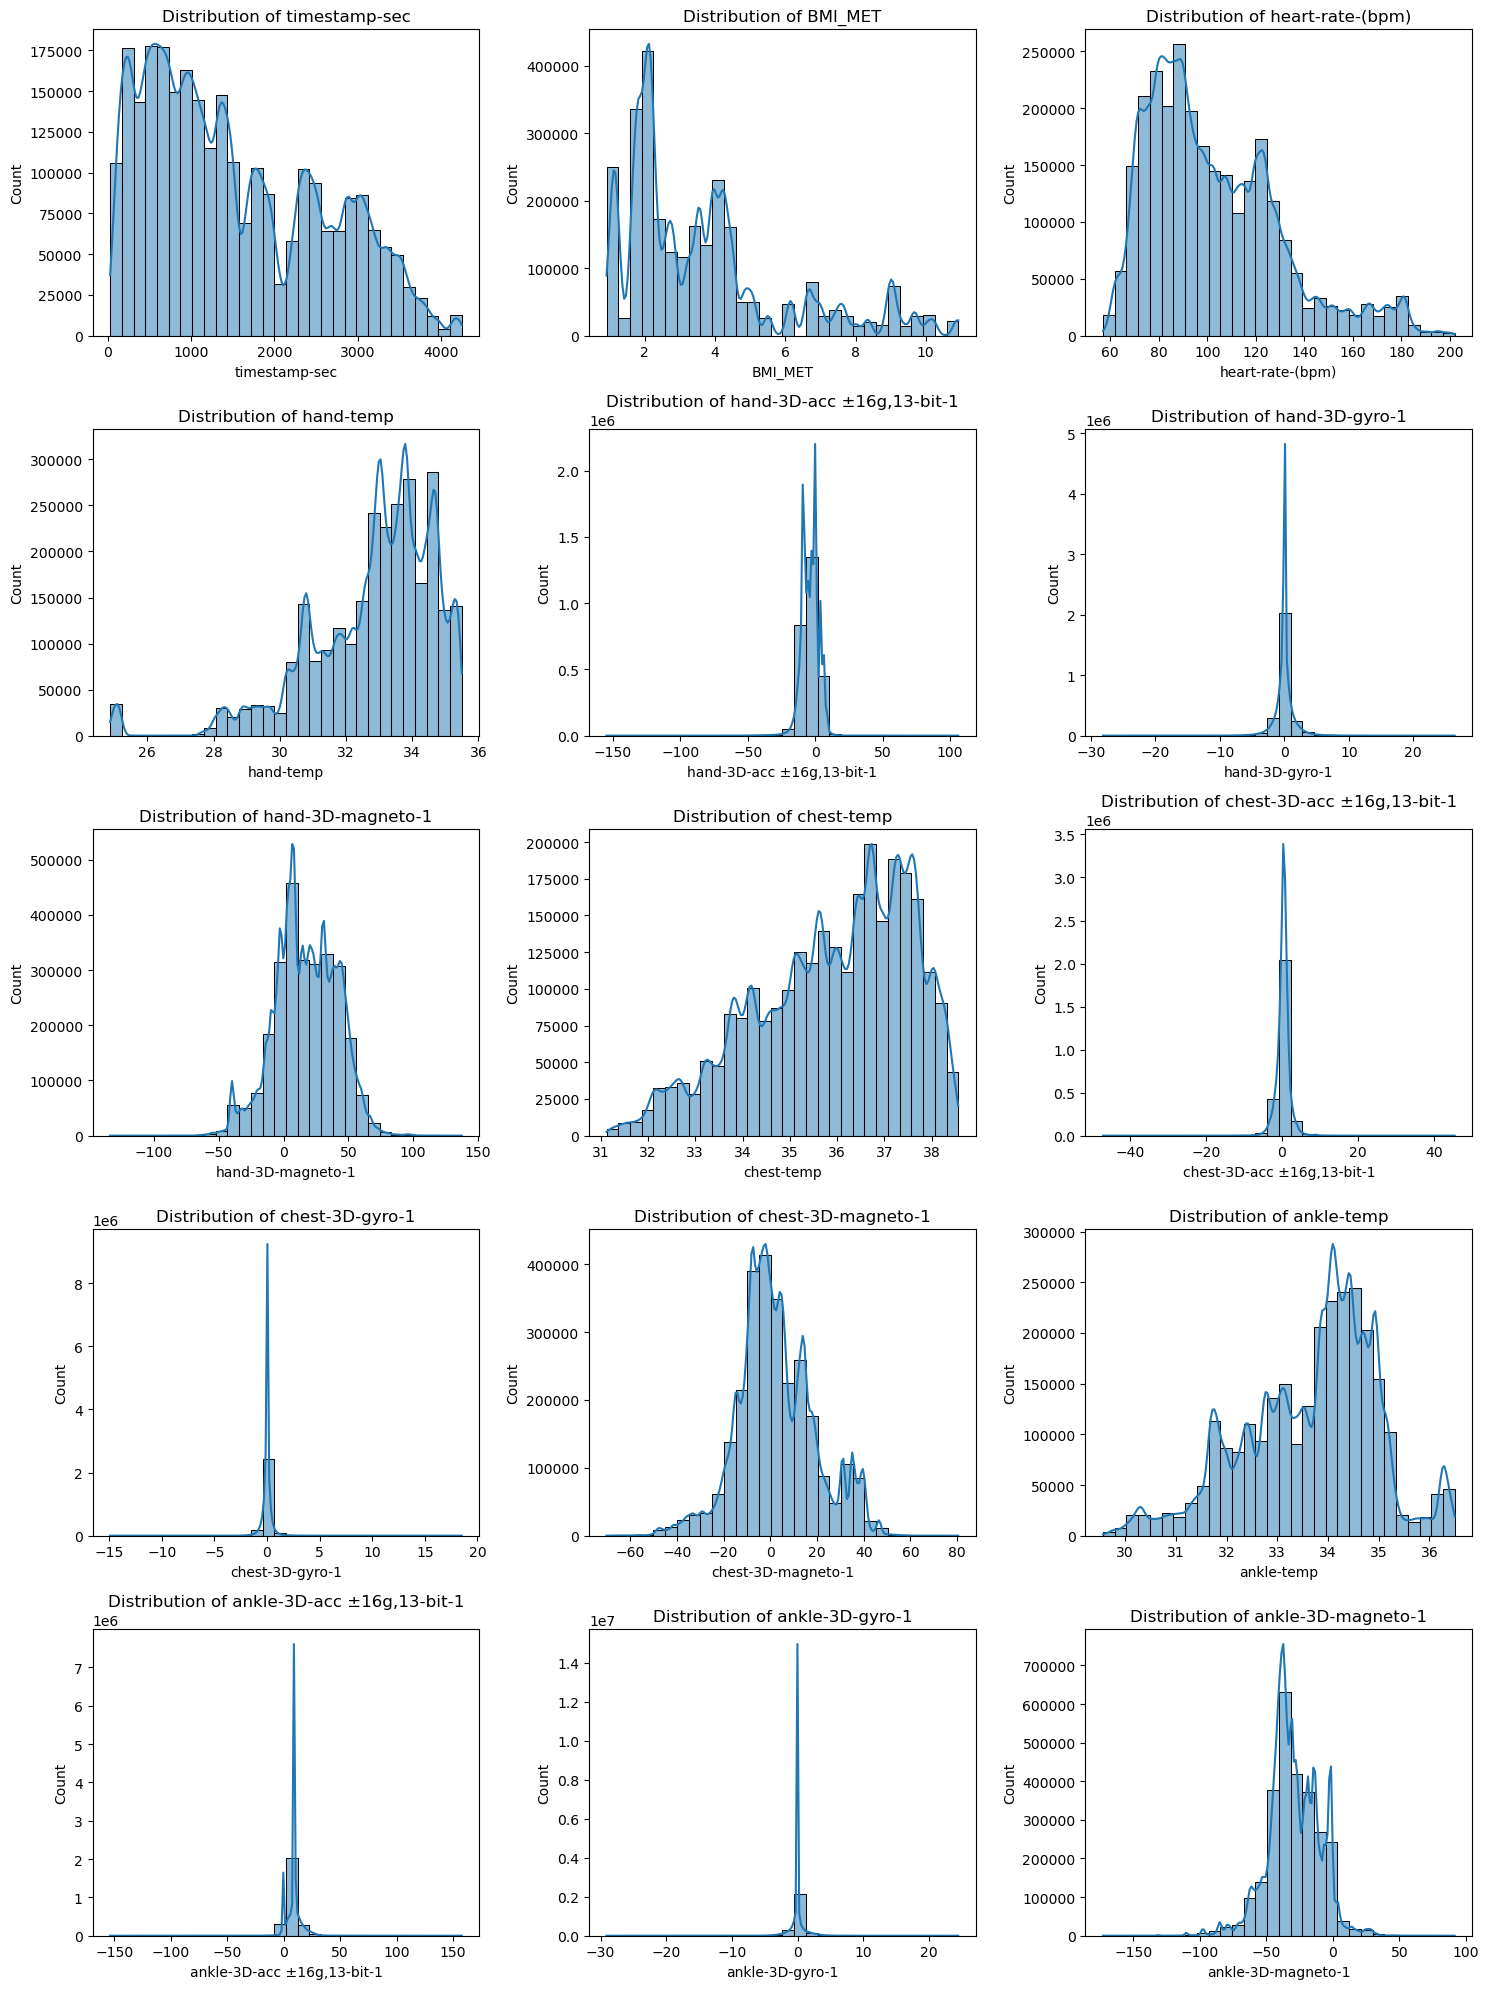

In [91]:
#splitting the columns 
exclude_features = ['subject_ID', 'activity', 'activity_ID','hand-3D-acc ±16g,13-bit-2',
                    'hand-3D-acc ±16g,13-bit-3', 'hand-3D-gyro-2', 'hand-3D-gyro-3', 'hand-3D-magneto-2', 'hand-3D-magneto-3', 
                    'chest-3D-acc ±16g,13-bit-2','chest-3D-acc ±16g,13-bit-3', 'chest-3D-gyro-2', 
                    'chest-3D-gyro-3', 'chest-3D-magneto-2', 'chest-3D-magneto-3', 'ankle-3D-acc ±16g,13-bit-2',
                    'ankle-3D-acc ±16g,13-bit-3', 'ankle-3D-gyro-2','ankle-3D-gyro-3', 'ankle-3D-magneto-2', 
                    'ankle-3D-magneto-3','hand-acc-mag', 'hand-magneto-mag', 'hand-gyro-mag', 'chest-acc-mag',
                    'chest-magneto-mag', 'chest-gyro-mag', 'ankle-acc-mag','ankle-magneto-mag', 'ankle-gyro-mag']


plot_features_1 = [feature for feature in df.columns if feature not in exclude_features]

rows = len(plot_features_1) // 3 + (len(plot_features_1) % 3 > 0)
cols = min(3, len(plot_features_1))

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, feature in enumerate(plot_features_1):
    sns.histplot(df[feature], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()
     


**observations**:

1. Heart-rate data is predominantly distributed between 60 bpm and 140 bpm, with a few readings surpassing 140 bpm.
2. Hand, chest, and ankle temperatures exhibit a similar trend, with minimal readings below 30°C.
3. Count of MET scores between 1-4 is significantly higher than MET scores of 5-9.
4. Accelerometer and gyroscope readings for x-axis are confined within their respective ranges.
5. Magnetometer x-axis readings for all three sensors display a similar pattern, confined between -60 and 60.
6. Outliers are noticeable in heart rate and temperature graphs.

#### Plotting Part 2 

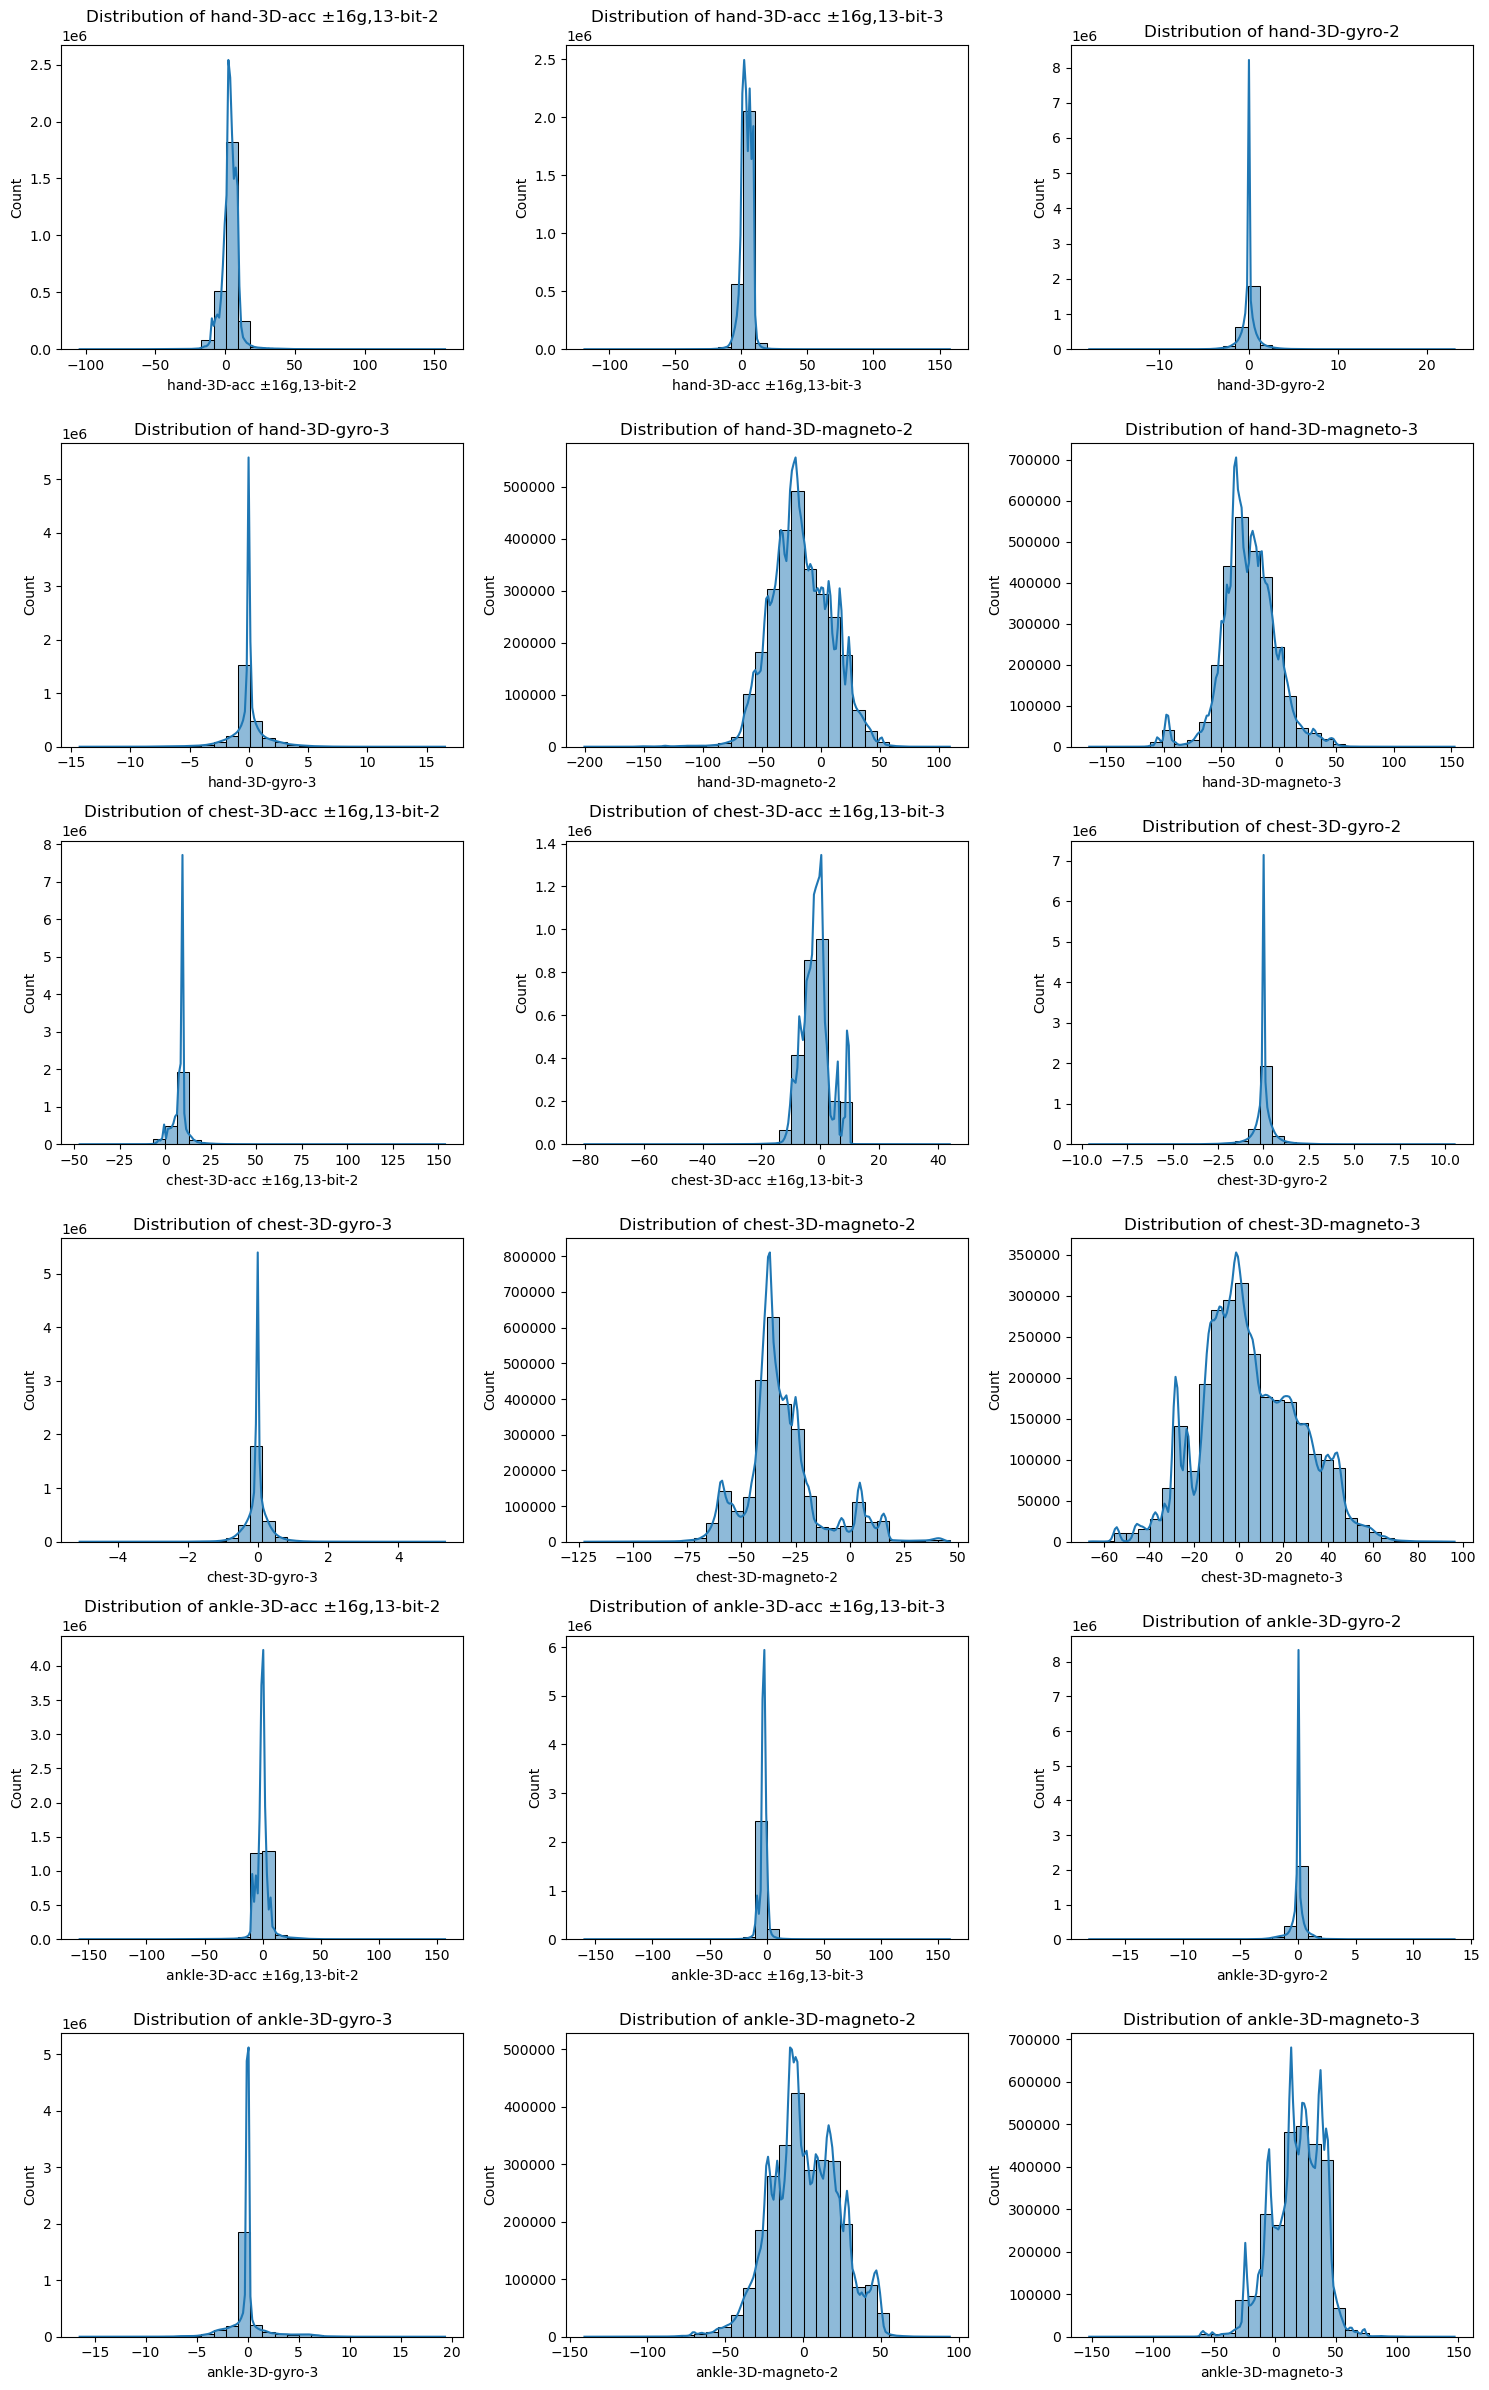

In [115]:
include_features = ['hand-3D-acc ±16g,13-bit-2',
                    'hand-3D-acc ±16g,13-bit-3', 'hand-3D-gyro-2', 'hand-3D-gyro-3', 'hand-3D-magneto-2', 'hand-3D-magneto-3', 
                    'chest-3D-acc ±16g,13-bit-2','chest-3D-acc ±16g,13-bit-3', 'chest-3D-gyro-2', 
                    'chest-3D-gyro-3', 'chest-3D-magneto-2', 'chest-3D-magneto-3', 
                      'ankle-3D-acc ±16g,13-bit-2','ankle-3D-acc ±16g,13-bit-3', 'ankle-3D-gyro-2',
                    'ankle-3D-gyro-3', 'ankle-3D-magneto-2', 'ankle-3D-magneto-3']


plot_features_2 = [feature for feature in df.columns if feature  in include_features]

rows = len(plot_features_2) // 3 + (len(plot_features_2) % 3 > 0)
cols = min(3, len(plot_features_1))

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, feature in enumerate(plot_features_2):
    sns.histplot(df[feature], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()
     

**observations**:

1. The accelerometer and gyroscope sensor readings for y and z axis are also strictly confined around its range just like the x-axis in above plots
2. The magnetometer y and z -axis readings for all three sensors are also showig similar pattern for each graph and the readings are confined between -60 to 60 just like x-axis


#### Plotting Part 3

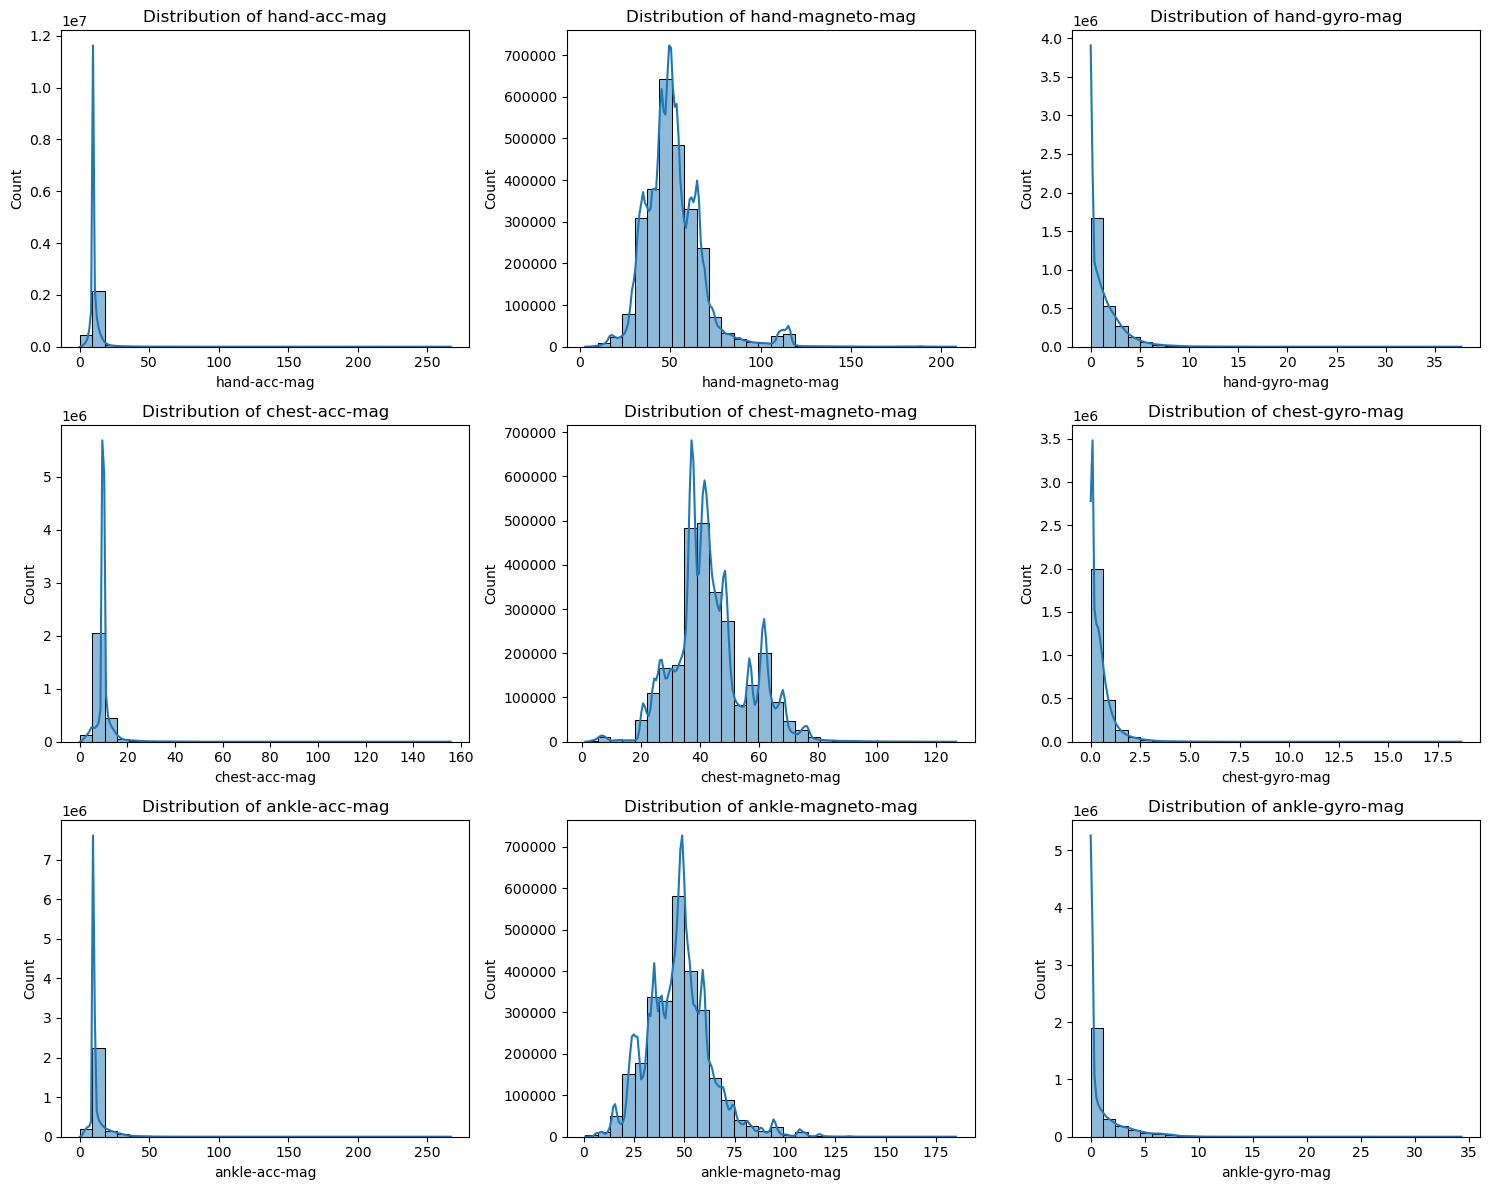

In [126]:
additional_features = ['hand-acc-mag', 'hand-magneto-mag', 'hand-gyro-mag', 'chest-acc-mag',
                    'chest-magneto-mag', 'chest-gyro-mag', 'ankle-acc-mag','ankle-magneto-mag', 'ankle-gyro-mag']


plot_features_3 = [feature for feature in df.columns if feature  in additional_features]

rows = len(plot_features_3) // 3 + (len(plot_features_3) % 3 > 0)
cols = min(3, len(plot_features_3))

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, feature in enumerate(plot_features_3):
    sns.histplot(df[feature], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

**observations**

1. The magnitude columns for each sensor that show a confined range in accelerometer and gyroscope between 0 to 20 but the mangetometer magnitude is distrubuted maximum around 30 to 60 in all three IMUs

### STEP 2: Plotting Box Plots to check for outliers


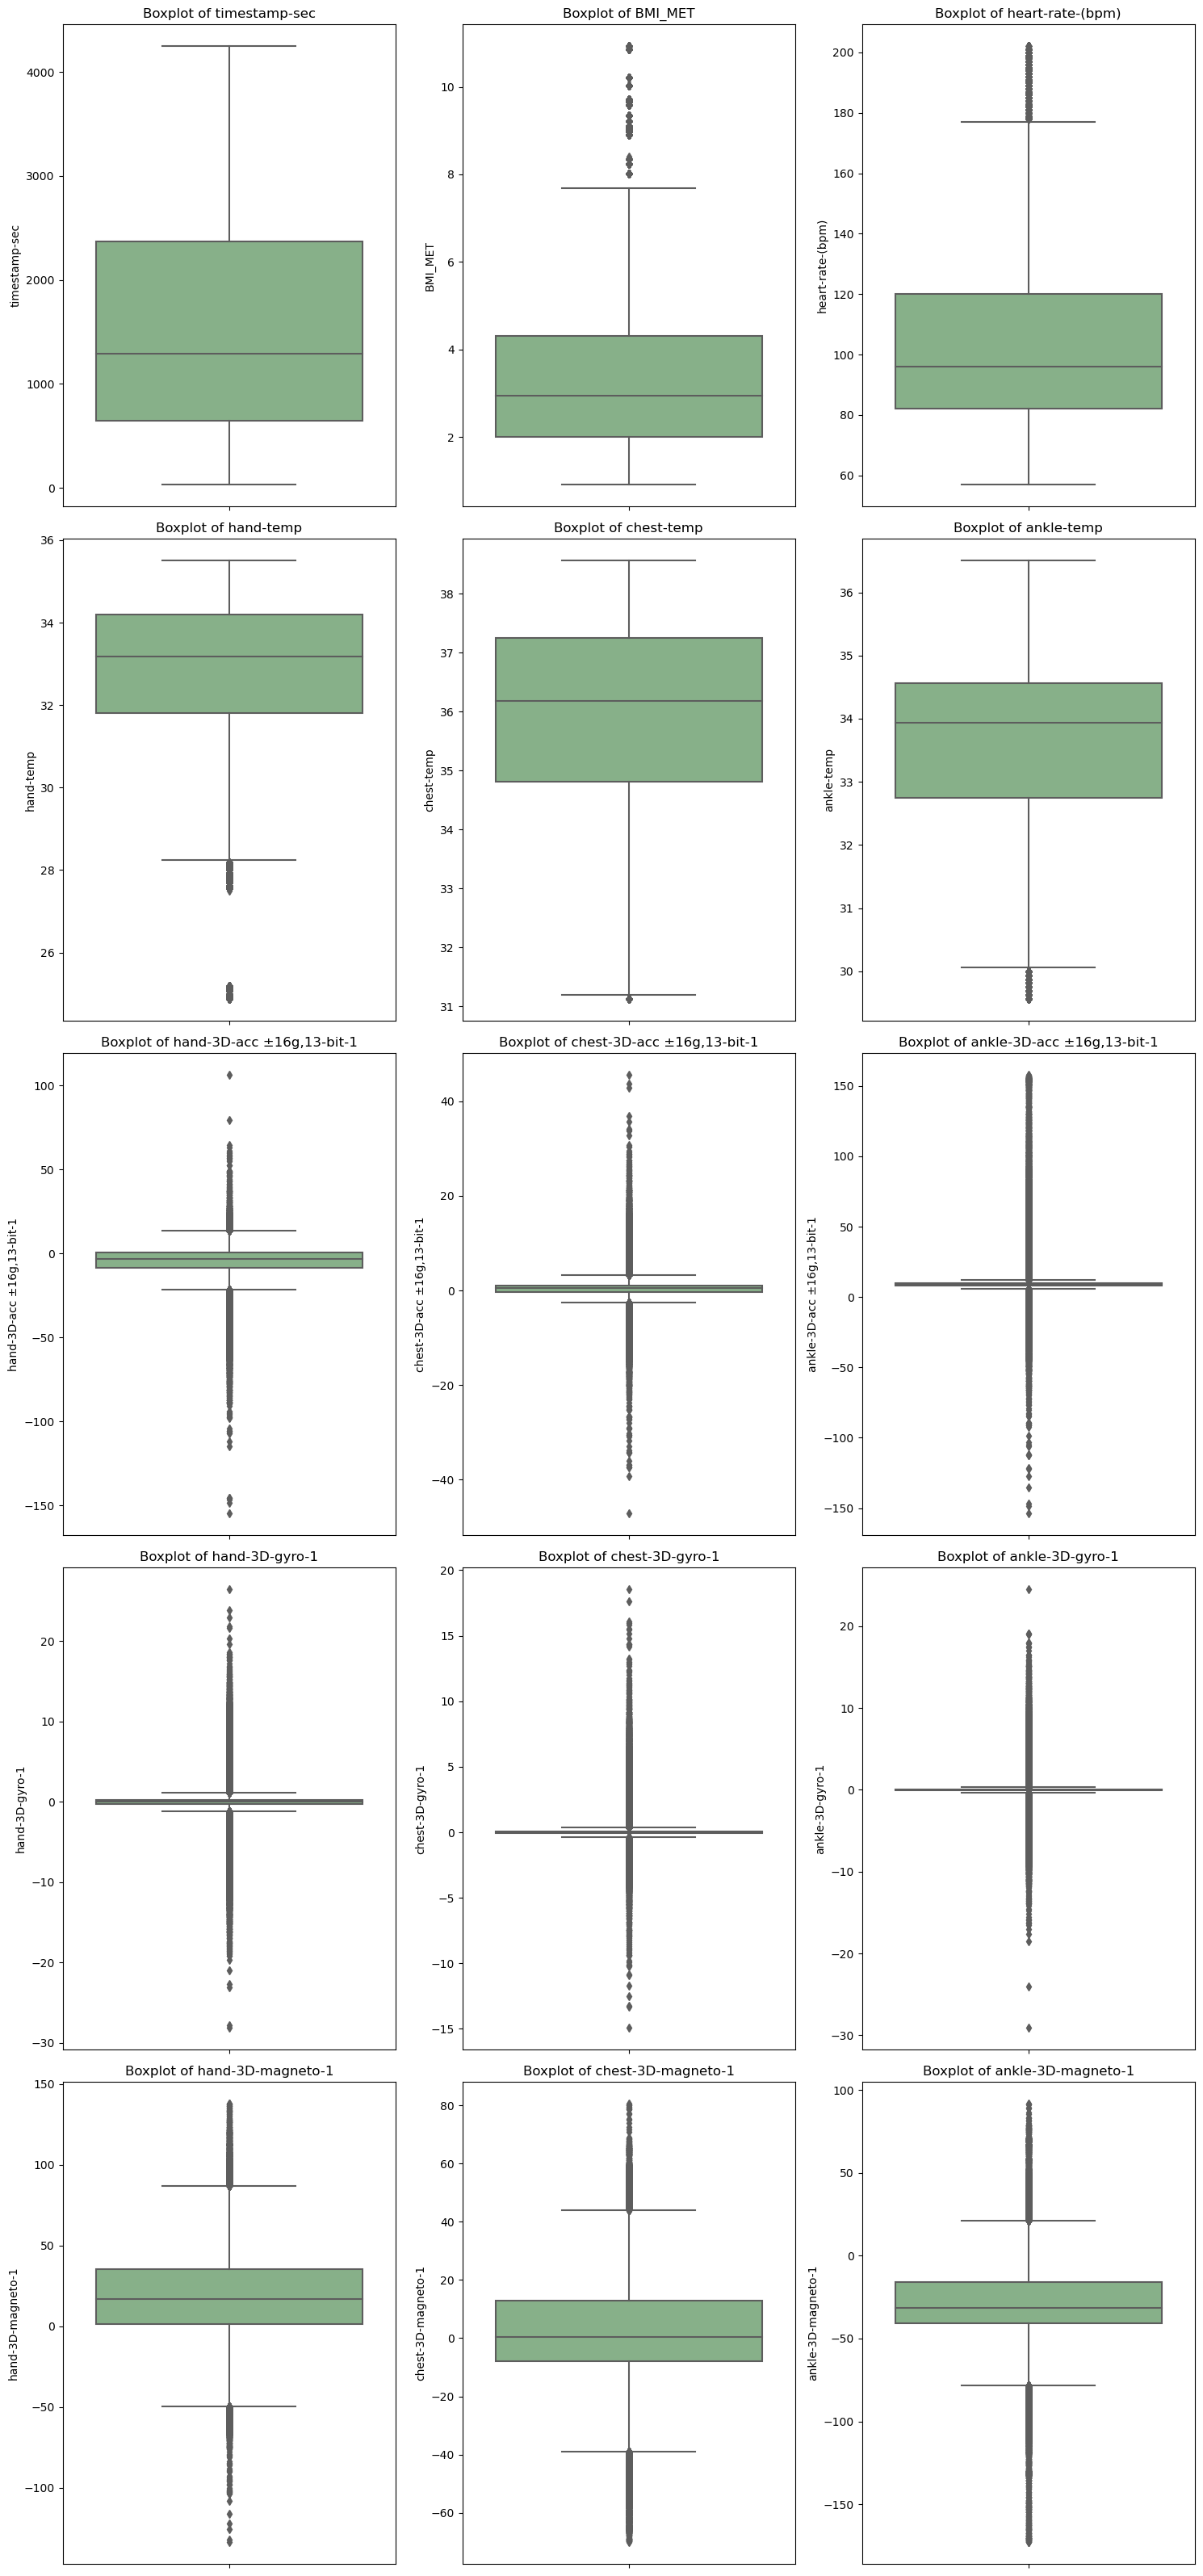

In [143]:
boxplotfeatures = ['timestamp-sec', 'BMI_MET',
       'heart-rate-(bpm)', 'hand-temp','chest-temp','ankle-temp', 'hand-3D-acc ±16g,13-bit-1', 'chest-3D-acc ±16g,13-bit-1',
       'ankle-3D-acc ±16g,13-bit-1', 'hand-3D-gyro-1', 'chest-3D-gyro-1', 'ankle-3D-gyro-1', 'hand-3D-magneto-1',
       'chest-3D-magneto-1','ankle-3D-magneto-1']

fig, axes = plt.subplots(5, 3, figsize=(15, 16*2))

axes = axes.flatten()
for i, feature in enumerate(boxplotfeatures):
    sns.boxplot(y=feature, data=df, palette='Greens', saturation=0.5, whis=1.5, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


**Observations**

1. Outliers in BMI-MET may result from limited participation in certain activities by one or two subjects.
2. Some outliers surpassing the maximum heart rate warrant further investigation.
3. Hand and ankle temperatures exhibit outliers below the minimum, with chest temperature's minimum higher. Further exploration is needed.
4. Exploration is required to understand the numerous outliers in the sensor graphs.
5. Subject-specific variations could contribute to the observed outliers. 

### STEP 3: Plotting Subject wise Plots

#### Checking heart rate plots of each subject

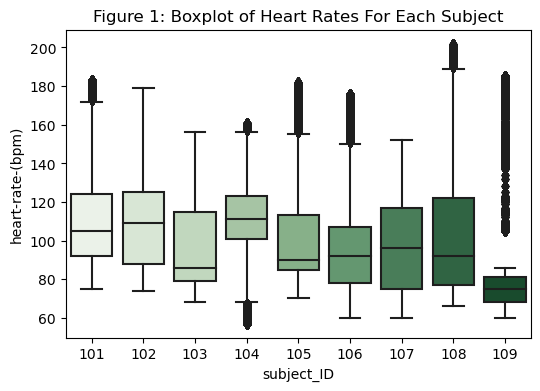

In [152]:
plt.figure(figsize=(6,4))
sns.boxplot(x='subject_ID',y='heart-rate-(bpm)',data=df,palette='Greens',saturation=0.5,
            whis=1.5).set_title("Figure 1: Boxplot of Heart Rates For Each Subject");

Subject 109 has participated in least activities that is the major reason most are the outliers are shown under subject 109

#### checking Hand temperature plots of each subject

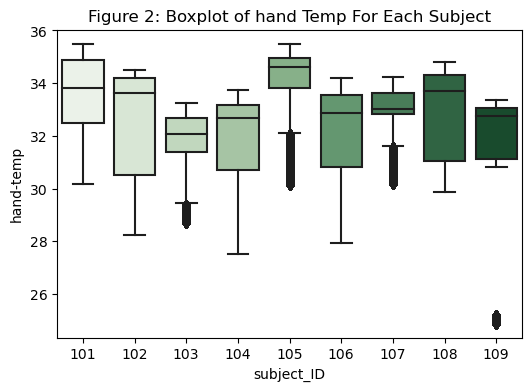

In [153]:
plt.figure(figsize=(6,4))
sns.boxplot(x='subject_ID',y='hand-temp',data=df,palette='Greens',saturation=0.5,
            whis=1.5).set_title("Figure 2: Boxplot of hand Temp For Each Subject");

We can see apart from subject 109 , subject 105 has an odd scale for hand temperature. we will analyse it further

#### Checking hand-accelerometer readings plot for each subject

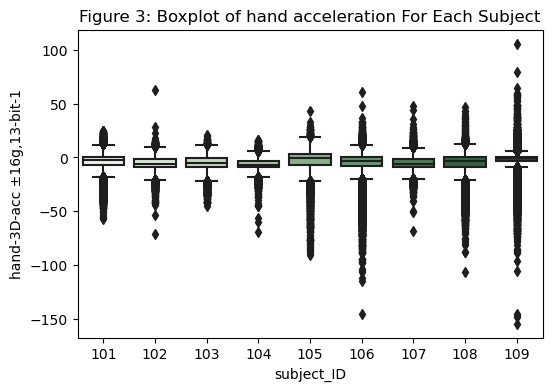

In [154]:
plt.figure(figsize=(6,4))
sns.boxplot(x='subject_ID',y='hand-3D-acc ±16g,13-bit-1',data=df,palette='Greens',saturation=0.5,
            whis=1.5).set_title("Figure 3: Boxplot of hand acceleration For Each Subject");


Almost all the subjects are showing outliers in the accelerometer sensor, we need to analyse it further to reach any conclusion

#### Checking hand-gyroscope plot for each subject

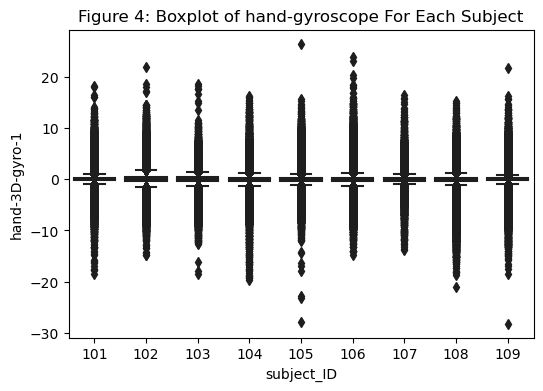

In [157]:
plt.figure(figsize=(6,4))
sns.boxplot(x='subject_ID',y='hand-3D-gyro-1',data=df,palette='Greens',saturation=0.5,
            whis=1.5).set_title("Figure 4: Boxplot of hand-gyroscope For Each Subject");

It could be that there are extreme values or variations in the angular rates during certain activities. Outliers in gyroscope data may be associated with rapid or intense rotational movements that exceed the normal range of motion.

#### checking hand-magnetometer plot for each subject

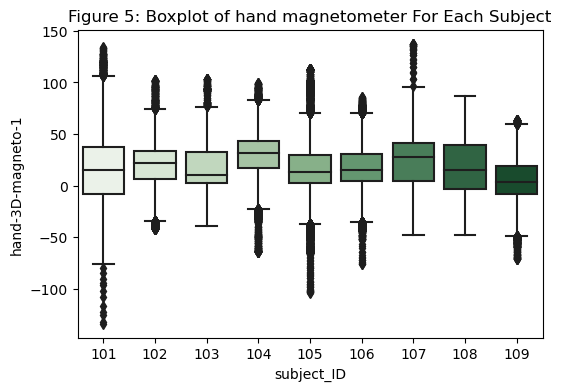

In [156]:
plt.figure(figsize=(6,4))
sns.boxplot(x='subject_ID',y='hand-3D-magneto-1',data=df,palette='Greens',saturation=0.5,
            whis=1.5).set_title("Figure 5: Boxplot of hand magnetometer For Each Subject");

Again its showing outliers which could be possibily due to the nature of activites done

### STEP 3: Checking for outliers in each column

In [208]:
subject_info

,subject_ID,Sex,Age_(years),Height_(cm),Weight_(kg),Resting HR_(bpm),Max_HR_(bpm),Dominant_hand,BMI
0,101,Male,27,182,83,75,193,right,25.057
1,102,Female,25,169,78,74,195,right,27.310
2,103,Male,31,187,92,68,189,right,26.309
3,104,Male,24,194,95,58,196,right,25.242
4,105,Male,26,180,73,70,194,right,22.531
5,106,Male,26,183,69,60,194,right,20.604
6,107,Male,23,173,86,60,197,right,28.735
7,108,Male,32,179,87,66,188,left,27.153
8,109,Male,31,168,65,54,189,right,23.030


#### Calculating questionable data in Heart-rate-(bpm)

According to the information provided in the data above, we are able to see each subject's maximum and minimum heart rates, which is 197 on higher scale and 54 on lower scale, respectively.so calculating any values passing these thresholds 

In [187]:
print("Heart Rate above 197 bpm (i.e MAX HR as per data)  =",(df["heart-rate-(bpm)"]>197).sum())
print("Heart Rate below 54 bpm (i.e Resting HR as per data) =",(df["heart-rate-(bpm)"]<54).sum())

Heart Rate above 197 bpm (i.e MAX HR as per data)  = 2585
Heart Rate below 54 bpm (i.e Resting HR as per data) = 0


we can say there are 2585 entries which are outliers as they are exceeding the Max Hr of 197 bpm i.e 0.09% of the data , but this is a very small fraction and this will hardly effect the data

#### Calculating questionable data in accelerometer readings

The scale of Accelerometer is ±16g , lets see for any readings above or below ±16g  

In [237]:
print("Readings above 16g \n \n",(df[["hand-3D-acc ±16g,13-bit-1","hand-3D-acc ±16g,13-bit-2","hand-3D-acc ±16g,13-bit-3","chest-3D-acc ±16g,13-bit-1","chest-3D-acc ±16g,13-bit-2","chest-3D-acc ±16g,13-bit-3","ankle-3D-acc ±16g,13-bit-1","ankle-3D-acc ±16g,13-bit-2","ankle-3D-acc ±16g,13-bit-3"]]>16).sum(),'\n')
print("Readings below -16g \n \n",(df[["hand-3D-acc ±16g,13-bit-1","hand-3D-acc ±16g,13-bit-2","hand-3D-acc ±16g,13-bit-3","chest-3D-acc ±16g,13-bit-1","chest-3D-acc ±16g,13-bit-2","chest-3D-acc ±16g,13-bit-3","ankle-3D-acc ±16g,13-bit-1","ankle-3D-acc ±16g,13-bit-2","ankle-3D-acc ±16g,13-bit-3"]]<-16).sum())

Readings above 16g 
 
 hand-3D-acc ±16g,13-bit-1       1554
hand-3D-acc ±16g,13-bit-2      46604
hand-3D-acc ±16g,13-bit-3       7514
chest-3D-acc ±16g,13-bit-1       366
chest-3D-acc ±16g,13-bit-2     73936
chest-3D-acc ±16g,13-bit-3       255
ankle-3D-acc ±16g,13-bit-1    195572
ankle-3D-acc ±16g,13-bit-2     54463
ankle-3D-acc ±16g,13-bit-3      5520
dtype: int64 

Readings below -16g 
 
 hand-3D-acc ±16g,13-bit-1     56840
hand-3D-acc ±16g,13-bit-2     11761
hand-3D-acc ±16g,13-bit-3      4068
chest-3D-acc ±16g,13-bit-1      197
chest-3D-acc ±16g,13-bit-2      270
chest-3D-acc ±16g,13-bit-3     5101
ankle-3D-acc ±16g,13-bit-1     2900
ankle-3D-acc ±16g,13-bit-2    26026
ankle-3D-acc ±16g,13-bit-3    13848
dtype: int64


A considerable portion of the data (18% or 506,795 records) is labeled as questionable. However, without certainty about their outlier status, we choose to retain them, reserving the option to eliminate them later if they are confirmed outliers.

Given uncertainties about the measurement scale in Magnetometer and Gyroscope columns (deviating from ±2000 °/s and ±1.3 Gauss), we refrain from checking for outliers in these columns.

#### calculating odd Temperature readings

Let's determine the temperature extremes that might be considered unusual specifically, temperatures below 24 degrees Celsius or above 38 degrees Celsius. But since chest is at the center of the body, we anticipate higher temperatures during exercise, attributed to elevated respiration and heart rates so the threshold for chest area would be 39 degree celsius

In [244]:
print("Below 25 Degree celsius",(df["hand-temp"]<25).sum(), "and Above 38 Degree Celsius",(df["hand-temp"]>38).sum())
print("Below 25 Degree celsius",(df["chest-temp"]<25).sum(), "and Above 39 Degree Celsius",(df["chest-temp"]>39).sum())
print("Below 25 Degree celsius",(df["ankle-temp"]<25).sum(), "and Above 38 Degree Celsius",(df["ankle-temp"]>38).sum())

Below 25 Degree celsius 7381 and Above 38 Degree Celsius 0
Below 25 Degree celsius 0 and Above 39 Degree Celsius 0
Below 25 Degree celsius 0 and Above 38 Degree Celsius 0


We are unable to classify any extremely low temperature cases as outliers until further information is obtained, as this represents a very small percentage of the data i.e 0.2% and may pertain solely to the entries of a single person.

### STEP 4 : Subject wise analysis of features

#### calculating each subject's average heart rate and temperature for each activity

In [326]:
df2 = df # Working on a parallel dataset 
df2['timestamp-sec'] = pd.to_datetime(df2['timestamp-sec'], unit='s')
subject_parameter_summary = df2.groupby(['subject_ID', 'activity']).agg(
    total_time_spent=('timestamp-sec', lambda x: (x.max() - x.min()).total_seconds() / 60),
    average_heart_rate=('heart-rate-(bpm)', 'mean'), average_chest_temp=('chest-temp','mean'), 
    average_hand_temp=('hand-temp','mean'),  average_ankle_temp=('ankle-temp', 'mean')
).reset_index()
subject_parameter_summary

,subject_ID,activity,total_time_spent,average_heart_rate,average_chest_temp,average_hand_temp,average_ankle_temp
0,101,Nordic walking,3.377333,139.634070,36.920582,32.397559,34.181765
1,101,ascending stairs,6.341667,144.295559,36.527945,33.789386,34.889315
2,101,car driving,9.086333,103.068985,36.370222,34.484794,34.936909
3,101,cycling,3.929000,127.220245,36.083087,31.633551,33.782987
4,101,descending stairs,4.392333,138.607642,36.801013,33.745551,34.892933
...,...,...,...,...,...,...,...
103,109,computer work,11.424833,66.909673,35.192499,32.224110,32.798245
104,109,folding laundry,4.554500,75.261934,36.996962,33.062112,34.381574
105,109,house cleaning,5.700833,78.066700,36.630857,33.273624,33.892626
106,109,playing soccer,4.796833,165.688249,32.579220,25.065732,31.656554


We can now view every task completed by the participants, the amount of time spent on each task, the average heart rate, and the average temperature of the body throughout each task. This will support our thorough analysis.

#### Plotting a heatmap for total time spent on activities by each subject

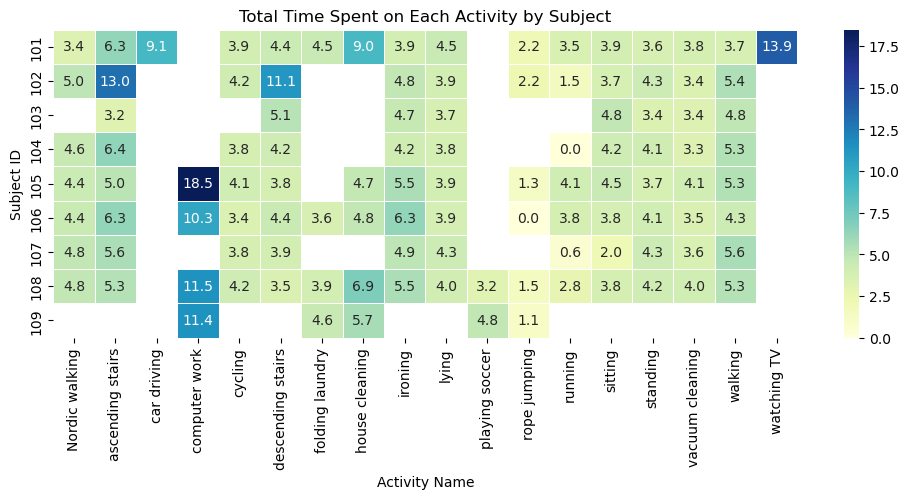

In [334]:
heatmap_average_time = subject_parameter_summary.pivot(index='subject_ID', columns='activity', values='total_time_spent')

plt.figure(figsize=(12, 4))
sns.heatmap(heatmap_average_time, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Total Time Spent on Each Activity by Subject')
plt.xlabel('Activity Name')
plt.ylabel('Subject ID')
plt.show()


Here we are getting a very clear picture of activities performed by each subject and the time spent on each activity.

**Observations**

1. Subject 109 completed only five of the eighteen activities, potentially explaining outlier readings due to insufficient data collection for the subject.
2. Among all activities, subjects spent the most time on computer work.
3. Car driving and TV watching were performed by only one participant (101), providing insufficient data for these classes. Soccer playing involved just two participants.
4. The average time spent in each activity ranges from 3-6 minutes.

#### Plotting a heatmap for average heart rate of each subject during each activity

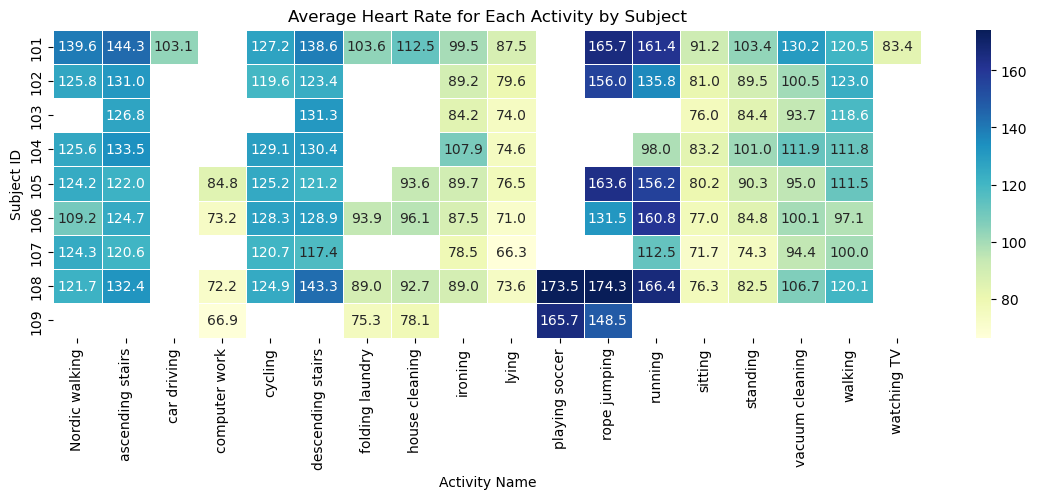

In [337]:
heatmap_average_heartrate = subject_parameter_summary.pivot(index='subject_ID', columns='activity', values='average_heart_rate')

plt.figure(figsize=(14, 4))
sns.heatmap(heatmap_average_heartrate, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Average Heart Rate for Each Activity by Subject')
plt.xlabel('Activity Name')
plt.ylabel('Subject ID')
plt.show()

This map provides us with an extremely clear picture of how the subjects' heart rates behave during each activity.

**Observations**

1. For each activity the heart rates are clearly in different bands
2. Soccer, rope jumping and running are the most exerting exercises as per the heart rate data
3. For nordic walking, cycling, climbing stairs, descending stairs, and walking, all subjects exhibit identical heart rates of about 120 bpm.
4. No subject has a different overall heart rate trend

#### Plotting a heatmap for average temperature of ankle, hand, chest of each subject during each activity

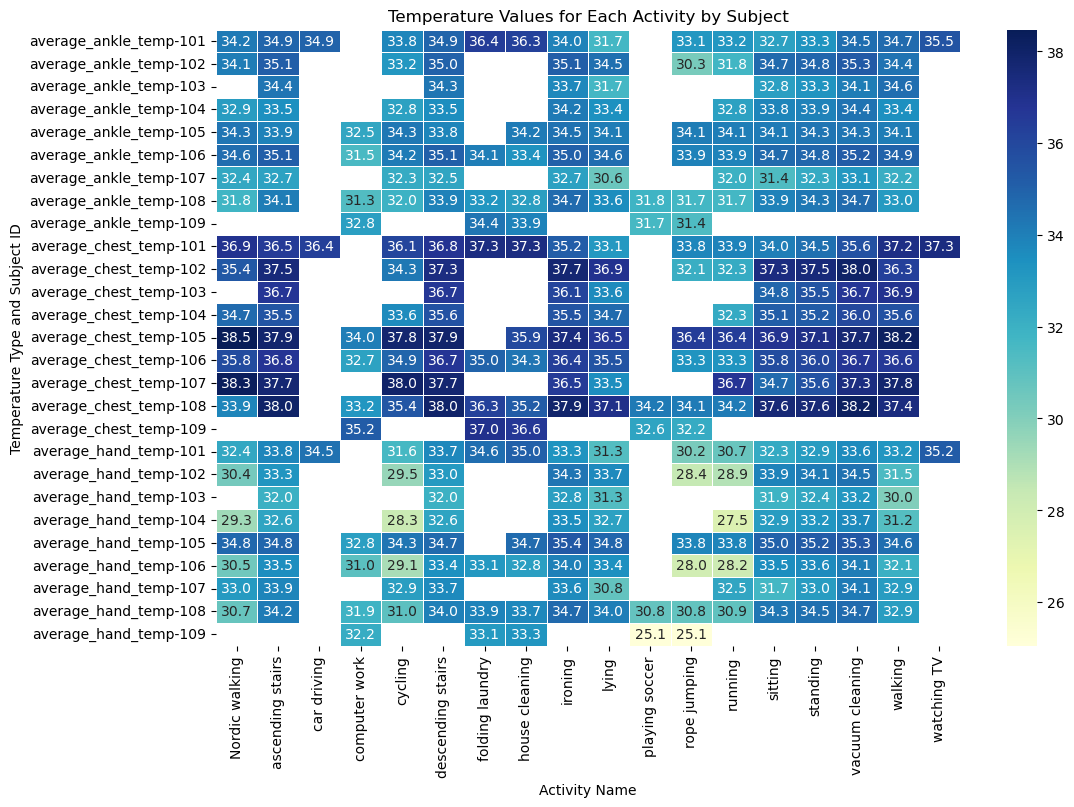

In [339]:
average_temps= pd.melt(subject_parameter_summary, id_vars=['subject_ID', 'activity'], value_vars=['average_ankle_temp', 'average_chest_temp', 'average_hand_temp'], var_name='Temperature_Type', value_name='Temperature_Value')

heatmap_temps = average_temps.pivot_table(index=['Temperature_Type', 'subject_ID'], columns='activity', values='Temperature_Value', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(average_temps, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Temperature Values for Each Activity by Subject')
plt.xlabel('Activity Name')
plt.ylabel('Temperature Type and Subject ID')
plt.show()

Plotting all the temperatures of each subject are giving us very meaningful insights

**Observations**
1. The average chest temperature for all subjects is higher than the ankle and hand temperatures.
2. The hand has the lowest temperatures compared to the chest and ankle, with several readings below average, potentially causing outliers in the plots.
3. Temperatures show subject-specific trends distinct from heart rates. For instance, subject 105's hand temperature exhibits a unique trend independent of activity.

### STEP 5: Checking the correlation between the columns

We will employ a different strategy to examine the correlations between each feature because we have a lot of columns.

we will plot heatmaps and cover all the numerical columns in our data step wise

#### Defining the correlation matrix

In [96]:
def correlation_matrix(data, columns, title):
    correlation_matrix = data[columns].corr()
    plt.figure(figsize=(10, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title(title)
    plt.show()

#### FEATURES SET 1
#### Plotting correlation matrix between Magnetometer sensor of all 3 IMUs , heart rate , time, activity ad MET score

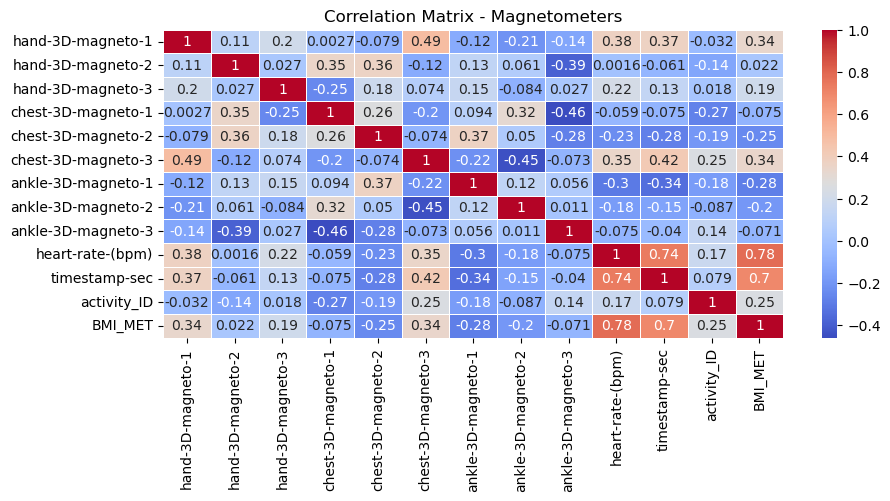

In [97]:
magneto_columns = [f'hand-3D-magneto-{i}' for i in range(1, 4)] + [f'chest-3D-magneto-{i}' for i in range(1, 4)] + \
                       [f'ankle-3D-magneto-{i}' for i in range(1, 4)] + ['heart-rate-(bpm)'] + ['timestamp-sec'] + ['activity_ID'] + ['BMI_MET']

correlation_matrix(df, magneto_columns, 'Correlation Matrix - Magnetometers')

**observations**

1. Heart Rate is highly correlated to BMI-MET score
2. Timestamp is showing a high correlation with the BMI-MET score
3. Chest and hand magnetometer axis-3 and axis-1 shows a slight correlation with heart rate, timestamp and MET score
4. Hand magnetometer axis-1 shows a descent correlation with chest magnetometer axis-3
5. Hand magnetometer axis-2 is showing a descent negative correlation with ankle magnetometer axis 3
6. Chest magnetometer axis-1 is showing a descent negative correlation with ankle magnetometer axis 3
7. Chest magnetometer axis-3 is showing a descent negative correlation with ankle magnetometer axis 2


#### FEATURES SET 2
#### Plotting correlation matrix between gyrometer sensor of all 3 IMUs , heart rate , time, activity ad MET score

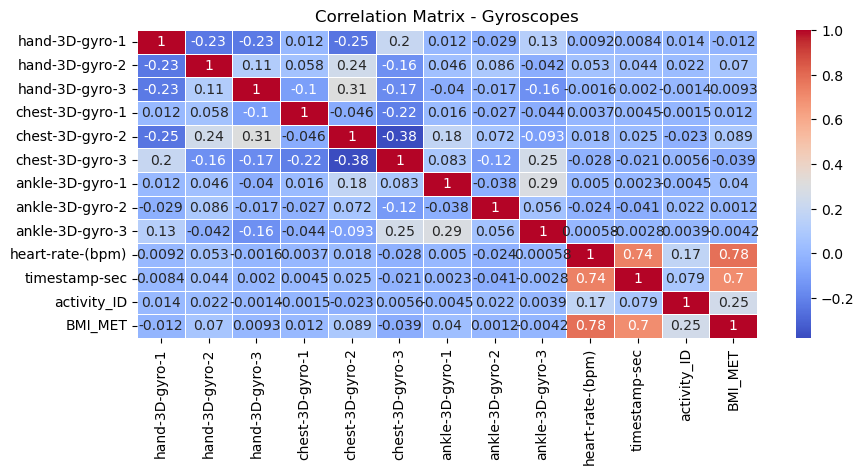

In [98]:
gyro_columns = [f'hand-3D-gyro-{i}' for i in range(1, 4)] + \
                    [f'chest-3D-gyro-{i}' for i in range(1, 4)] + \
                    [f'ankle-3D-gyro-{i}' for i in range(1, 4)] + ['heart-rate-(bpm)'] + ['timestamp-sec'] + \
                     ['activity_ID'] + ['BMI_MET']

correlation_matrix(df, gyro_columns, 'Correlation Matrix - Gyroscopes')

**observations**
1. Chest gyroscope axis-2 shows a slight correlation with hand gyroscope axis-3
2. Ankle gyroscope axis 3 showing a slight correlation with chest and ankle gyroscope axis 3 and axis 1
1. Hand gyroscope axis-1 is showing slight negative correlation with axis-2 and axis-3
2. Hand gyroscope axis-1 is showing a slight negative correlation with chest gyroscope axis-2
3. Chest gyroscope axis-3 is showing slight negative correlation with axis 1 and axis 2

#### FEATURES SET 3

#### Plotting correlation matrix  between Temperature sensors of all 3 IMUs , heart rate , time, activity ad MET score

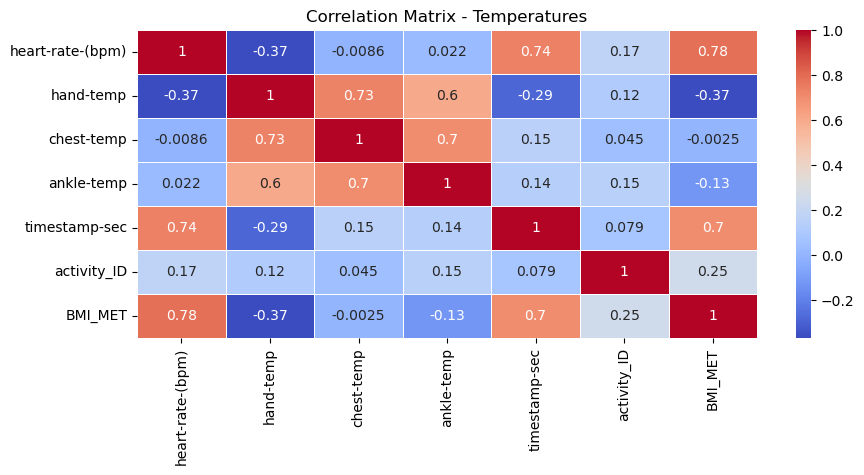

In [99]:
temp_columns = ['heart-rate-(bpm)','hand-temp','chest-temp','ankle-temp','timestamp-sec','activity_ID','BMI_MET']

correlation_matrix(df, temp_columns, 'Correlation Matrix - Temperatures')

**Observations**

1. Hand, chest and ankle temperatures are highly correlated to each other
2. Heart rate and BMI-MET have a slight negative correlation with hand temperature.

#### FEATURES SET 4

#### Plotting correlation matrix  between Accelerometer sensors of all 3 IMUs , heart rate , time, activity ad MET score

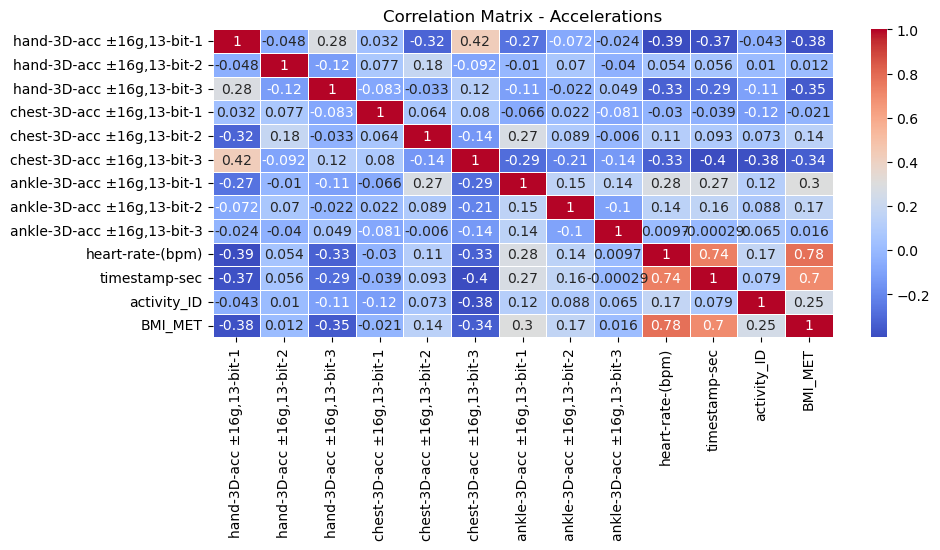

In [100]:
acc_columns = [f'hand-3D-acc ±16g,13-bit-{i}' for i in range(1, 4)] + [f'chest-3D-acc ±16g,13-bit-{i}' for i in range(1, 4)] + \
                       [f'ankle-3D-acc ±16g,13-bit-{i}' for i in range(1, 4)] + ['heart-rate-(bpm)'] + ['timestamp-sec'] + \
                       ['activity_ID'] + ['BMI_MET']

correlation_matrix(df, acc_columns, 'Correlation Matrix - Accelerations')


**Observations**

1. Hand Accelerometer axis-1 and axis-3 shares a slight negative correlation with heart rate and BMI-MET
2. Chest accelerometer axis-3 shares shares a slight negative correlation with heart rate, activity ID and BMI-MET
2. Chest accelerometer axis-3 shares a positive correlation between Hand Accelerometer axis-1

#### FEATURES SET 5
#### Plotting correlation matrix  between all the sensors of ankle

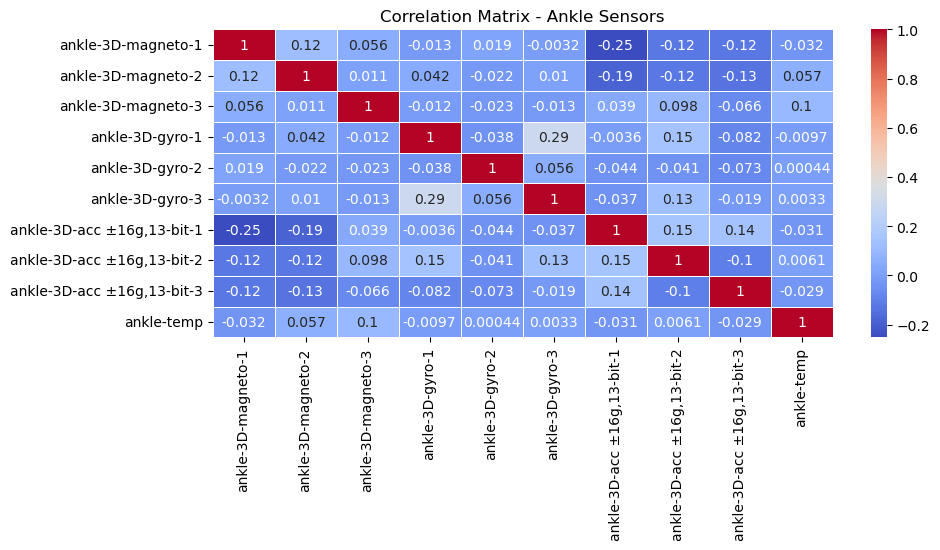

In [253]:
ankle_columns = [f'ankle-3D-magneto-{i}' for i in range(1, 4)] + \
                [f'ankle-3D-gyro-{i}' for i in range(1, 4)] + \
                [f'ankle-3D-acc ±16g,13-bit-{i}' for i in range(1, 4)] + ['ankle-temp']

correlation_matrix(df, ankle_columns, 'Correlation Matrix - Ankle Sensors')


**observations**

1. We can see a slight negative correlation of magnetometer axis 1 and accelerometer axis 1

#### FEATURES SET 6

#### Plotting correlation matrix  between all the sensors of chest

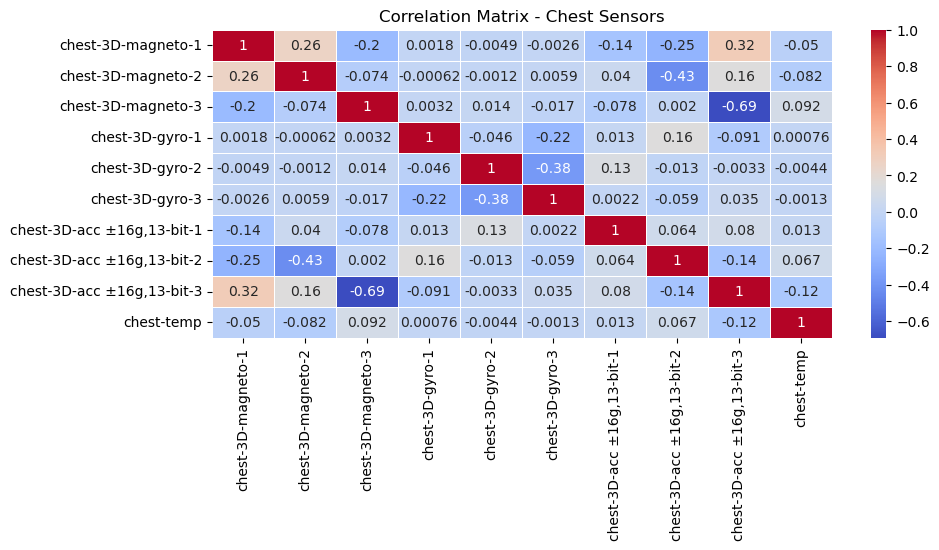

In [254]:
chest_columns = [f'chest-3D-magneto-{i}' for i in range(1, 4)] + \
                [f'chest-3D-gyro-{i}' for i in range(1, 4)] + \
                [f'chest-3D-acc ±16g,13-bit-{i}' for i in range(1, 4)] + ['chest-temp']

correlation_matrix(df, chest_columns, 'Correlation Matrix - Chest Sensors')



**Observations**

1. magnetometer axis 3 shares a high negative correlation with accelerometer axis 3
2. magnetometer axis 1 and 2 shares a decent corrleation with accelerometer axis 2
2. accelerometer axis 3 shares a postive correlation with magnetometer axis 1

#### FEATURES SET 7

#### Plotting correlation matrix  between all the sensors of hand

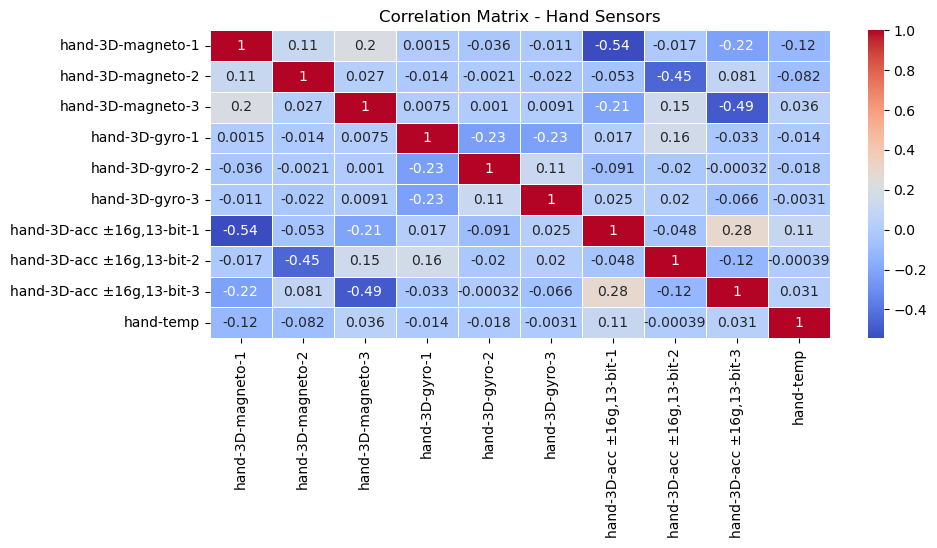

In [255]:
hand_columns = [f'hand-3D-magneto-{i}' for i in range(1, 4)] + \
               [f'hand-3D-gyro-{i}' for i in range(1, 4)] + \
               [f'hand-3D-acc ±16g,13-bit-{i}' for i in range(1, 4)] + ['hand-temp']

correlation_matrix(df, hand_columns, 'Correlation Matrix - Hand Sensors')

**observations**

1. magnetometer axis 1 , 2 and 3 is correlated to accelerometer axis 1 2 and 3 negatively

#### FEATURES SET 8

#### Plotting correlation matrix  between the magnitude of sensors , heart rate, BMI-MET and activity ID

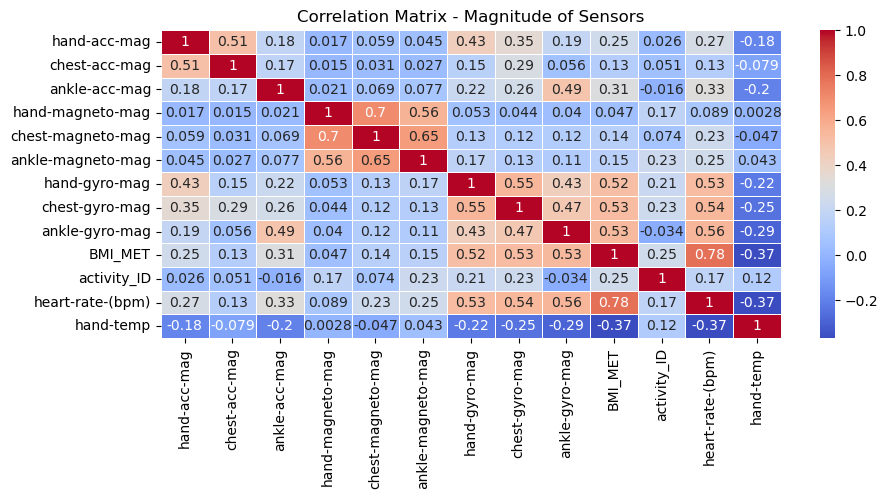

In [323]:
mag_columns = ['hand-acc-mag', 'chest-acc-mag', 'ankle-acc-mag','hand-magneto-mag','chest-magneto-mag',
               'ankle-magneto-mag','hand-gyro-mag', 'chest-gyro-mag','ankle-gyro-mag', 'BMI_MET', 'activity_ID',
               'heart-rate-(bpm)','hand-temp']

correlation_matrix(df, mag_columns, 'Correlation Matrix - Magnitude of Sensors')

**Observations**

1. Magnitude of chest ankle and hand magnetometers share a high correlation with each other
2. Magnitude of hand chest and ankle gyroscope share a high correlation with heart rate and BMI-MET
3. Magnitude of chest ankle and hand gyroscope share a high correlation with each other
4. Magnitude of chest and hand accelerometer share a high correlation with each other
5. Magnitude of ankle gyroscope share a decent correlation with ankle accelerometer magnitude
6. Magnitude of hand gyroscope share a decent correlation with hand accelerometer magnitude

### STEP 6: Hypothesis

$\textbf{Null Hypothesis (\(H_0\)):}$
The mean heart rates of activities with similar MET scores are equal.

$\textbf{Alternate Hypothesis (\(H_a\)):}$
The mean heart rates of activities with similar MET scores are not equal.


We've selected "Sitting", "Lying" ,"Ironing" , "Standing" for comparison. Our objective is to detect any significant differences in heart rates between these  activities. Opting for a two-tail T-test will allow us to assess the mean heart rates without focusing on the direction of the difference. These activities were chosen for their equal duration, participation, and nearly identical MET scores, ensuring high-quality and comparable data for analysis.

In [286]:
sitting_heartrate = df[df['activity'] == 'sitting']['heart-rate-(bpm)']
lying_heartrate = df[df['activity'] == 'lying']['heart-rate-(bpm)']
standing_heartrate = df[df['activity'] == 'standing']['heart-rate-(bpm)']
ironing_heartrate = df[df['activity'] == 'ironing']['heart-rate-(bpm)']


t_statistic1, p_value1 = stats.ttest_ind( sitting_heartrate, lying_heartrate,equal_var=False)
t_statistic2, p_value2 = stats.ttest_ind(lying_heartrate, standing_heartrate,equal_var=False)
t_statistic3, p_value3 = stats.ttest_ind( sitting_heartrate, standing_heartrate,equal_var=False)
t_statistic4, p_value4 = stats.ttest_ind( ironing_heartrate, standing_heartrate,equal_var=False)
t_statistic5, p_value5 = stats.ttest_ind( ironing_heartrate, lying_heartrate,equal_var=False)
t_statistic6, p_value6 = stats.ttest_ind( ironing_heartrate, sitting_heartrate,equal_var=False)

print(f"T-statistic: {t_statistic1:.2f}, P-value: {p_value1:.2f}")
print(f"T-statistic: {t_statistic2:.2f}, P-value: {p_value2:.2f}")
print(f"T-statistic: {t_statistic3:.2f}, P-value: {p_value3:.2f}")
print(f"T-statistic: {t_statistic4:.2f}, P-value: {p_value4:.2f}")
print(f"T-statistic: {t_statistic5:.2f}, P-value: {p_value5:.2f}")
print(f"T-statistic: {t_statistic6:.2f}, P-value: {p_value6:.2f}")

T-statistic: 147.49, P-value: 0.00
T-statistic: -391.31, P-value: 0.00
T-statistic: -288.21, P-value: 0.00
T-statistic: 51.47, P-value: 0.00
T-statistic: 481.30, P-value: 0.00
T-statistic: 384.84, P-value: 0.00


The magnitude of the T-statistic in all cases indicates a substantial difference between the two groups
The extremely low p-value (0.00) in all cases implies strong evidence against the null hypothesis.
Thus, we can conclude that the mean heart rates of two activities completed for comparable lengths of time with similar MET scores are not equal making heart rates an essentail feature.

Based on this and the analysis we did above we may now proceed with creating a model.

# PART C: Building a Model

Based on the Exploratory Data Analysis (EDA) conducted, we have observed patterns and insights that indicate the feasibility of building a predictive model. We have identified the potential to predict the activity being done or categorize activities based on MET scores. So we have decided to build both models

Based on the analysis from our EDA, which will now serve as the foundation for our model construction, these are the few things we need to keep in mind.
1. Due to the correlation between the temperatures of the hands, ankle, and chest, we must either utilise one of them or use them in separate models.
2. Heart rates are impportant feature for model building 
3. Sensor axis show slight correlations with each other within the IMU and with other IMUs but we will use them on same model
4. The magnitude of sensors exhibits a strong correlation with heart rates and MET scores so we would be considering them
5. Since the timestamp has a strong correlaton with heart rate (a crucial component for us) so we are not moving forward with it. 

We have opted for linear regression as a pragmatic choice, acknowledging its simplicity and transparency.

### STEP 1: Constructing a linear regression model to predict activity




We are building three separate models to predict activity, each focusing on a specific set of features (ankle, chest, and hand). 

#### Defining X and Y for our models

x1 contains the magnitude of Hand sensors

x2 contains the magnitude of Chest sensors

x3 contains the magnitude of ankle sensors

In [385]:
x1 = df[['heart-rate-(bpm)','BMI_MET', 'hand-temp','hand-acc-mag', 'hand-magneto-mag', 'hand-gyro-mag']]

x2 = df[['heart-rate-(bpm)','BMI_MET','chest-temp', 'chest-acc-mag','chest-magneto-mag', 'chest-gyro-mag']]

x3 = df[['heart-rate-(bpm)','BMI_MET','ankle-temp', 'ankle-acc-mag','ankle-magneto-mag', 'ankle-gyro-mag']]

y = df['activity_ID']

#### Defining our model

In [386]:
##Importing important libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#splitting the data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.2, random_state=39) 
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.2, random_state=40)
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y, test_size=0.2, random_state=41)

# Creating and training the linear regression models separately
model1 = LinearRegression()
model1.fit(x1_train, y1_train)

model2 = LinearRegression()
model2.fit(x2_train, y2_train)

model3 = LinearRegression()
model3.fit(x3_train, y3_train)

# Predict using the corresponding test sets
y1_pred = model1.predict(x1_test)
y2_pred = model2.predict(x2_test)
y3_pred = model3.predict(x3_test)

# Evaluating the models
mse_model1 = mean_squared_error(y1_test, y1_pred)
r2_model1 = r2_score(y1_test, y1_pred)

mse_model2 = mean_squared_error(y2_test, y2_pred)
r2_model2= r2_score(y2_test, y2_pred)

mse_model3 = mean_squared_error(y3_test, y3_pred)
r2_model3 = r2_score(y3_test, y3_pred)

#### Getting the MSE and R^2 score for our activity prediction models

In [387]:
print(f'MSE for Hand sensors-activity prediction model: {mse_model1:.2f}')
print(f'R^2 Score for Hand sensors activity prediction model: {r2_model1:.2f}\n')
print(f'MSE for chest sensors-activity prediction model: {mse_model2:.2f}')
print(f'R^2 Score for chest sensors-activity prediction model: {r2_model2:.2f}\n')
print(f'MSE for ankle sensors-activity prediction model: {mse_model3:.2f}')
print(f'R^2 Score for ankle sensors-activity prediction model: {r2_model3:.2f}')

MSE for Hand sensors-activity prediction model: 33.34
R^2 Score for Hand sensors activity prediction model: 0.15

MSE for chest sensors-activity prediction model: 35.90
R^2 Score for chest sensors-activity prediction model: 0.09

MSE for ankle sensors-activity prediction model: 32.76
R^2 Score for ankle sensors-activity prediction model: 0.17


In all three models, we observe very high MSE and extremely low  R$^{2}$. The primary reason is that,  activity ID is more of a categorical data as each ID represents a class, logistic regression should be used rather than linear regression.Additionally One possible explanation is that the data is not evenly weighted. Let's examine the target variable's value counts.



#### Checking the weight distrubution in our target variable

Text(0.5, 1.0, 'Distribution of Activity ID')

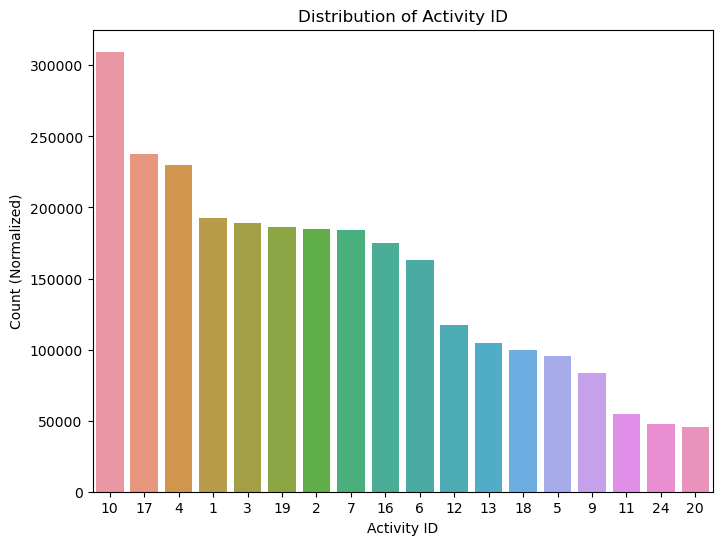

In [531]:
activity_counts = df['activity_ID'].value_counts(normalize=True)

# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='activity_ID', order=activity_counts.index)
plt.xlabel('Activity ID')
plt.ylabel('Count (Normalized)')
plt.title('Distribution of Activity ID')

Although our data shows some uneven weight distribution, we would not proceed with balancing 

#### Checking coefficients

In [389]:
coefficients_data = {'Hand_Coefficient': model1.coef_, 'Chest_Coefficient': model2.coef_,'Ankle_Coefficient': model3.coef_,}
columns_coeff = ['heart-rate-(bpm)','BMI_MET','Temp','Accelerometer Magnitude','Magnetometer Magnitude','Gyroscope Magnitude']
model_output = pd.DataFrame(coefficients_data, index=columns_coeff)
model_output['Hand_Coefficient'] = model_output['Hand_Coefficient'].apply(lambda x: '{:.2f}'.format(x))
model_output['Chest_Coefficient'] = model_output['Chest_Coefficient'].apply(lambda x: '{:.2f}'.format(x))
model_output['Ankle_Coefficient'] = model_output['Ankle_Coefficient'].apply(lambda x: '{:.2f}'.format(x))

model_output

,Hand_Coefficient,Chest_Coefficient,Ankle_Coefficient
heart-rate-(bpm),-0.02,-0.03,-0.02
BMI_MET,0.86,0.71,1.20
Temp,0.76,0.19,0.78
Accelerometer Magnitude,-0.07,-0.03,-0.02
Magnetometer Magnitude,0.06,0.02,0.07
Gyroscope Magnitude,0.59,1.77,-0.78


We can see in all three models BMI-MET and Temperature is contrubuting to model prediction but heart rate is showing no relationship

 Working on this model would not be much productive so We have decided to focus on our other model where we predict the MET scores which is a continious data and should give better results with linear regression

### STEP 2: Constructing a linear regression model to predict MET Scores

#### Checking the weight distribution within MET data

Text(0.5, 1.0, 'Distribution of MET scores')

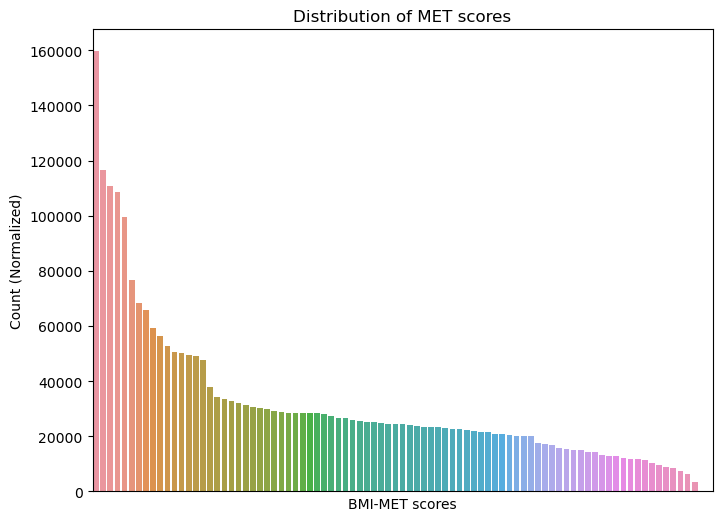

In [546]:
MET_counts = df['BMI_MET'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='BMI_MET', order=MET_counts.index)
plt.xlabel('BMI-MET scores')
plt.xticks([])
plt.ylabel('Count (Normalized)')
plt.title('Distribution of MET scores')

Since it is evident that the weight of the data is not distributed evenly, but we will still move forward with the model's building. If it is determined that additional weight balancing is necessary because the results are not satisfactory, we will do so.

#### Defining X and Y for our models

Here we are taking a different approach in this case. Keeping in mind that few features are correlated to each other we are defining variables X1, X2, X3 for three MET score prediction models

X1 contains the features of hand sensors with all axis

X2 contains the features of chest sensors with all axis and their magnitudes

X3 conatins the magnitude of ankle sensors 

In [524]:
X1 = df[['activity_ID','heart-rate-(bpm)', 'hand-temp','hand-3D-acc ±16g,13-bit-1','hand-3D-acc ±16g,13-bit-2',
        'hand-3D-acc ±16g,13-bit-3','hand-3D-gyro-1', 'hand-3D-gyro-2', 'hand-3D-gyro-3','hand-3D-magneto-1', 
          'hand-3D-magneto-2', 'hand-3D-magneto-3']]

X2 = df[['activity_ID','heart-rate-(bpm)','chest-temp','chest-3D-acc ±16g,13-bit-1','chest-3D-acc ±16g,13-bit-2', 
        'chest-3D-acc ±16g,13-bit-3','chest-3D-gyro-1', 'chest-3D-gyro-2', 'chest-3D-gyro-3','chest-3D-magneto-1',
         'chest-3D-magneto-2', 'chest-3D-magneto-3','chest-acc-mag','chest-magneto-mag', 'chest-gyro-mag']]

X3 = df[['activity_ID','heart-rate-(bpm)','ankle-temp','ankle-acc-mag','ankle-magneto-mag', 'ankle-gyro-mag']]

Y = df['BMI_MET']

#### Defining the model

In [522]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y, test_size=0.2, random_state=42)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y, test_size=0.2, random_state=43)
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y, test_size=0.2, random_state=44)

# Creating and training the linear regression models separately
model4 = LinearRegression()
model4.fit(X1_train, Y1_train)

model5 = LinearRegression()
model5.fit(X2_train, Y2_train)

model6 = LinearRegression()
model6.fit(X3_train, Y3_train)

# Predicting using the corresponding test sets
Y1_pred = model4.predict(X1_test)
Y2_pred = model5.predict(X2_test)
Y3_pred = model6.predict(X3_test)

# Evaluating the models
mse_model4 = mean_squared_error(Y1_test, Y1_pred)
r2_model4 = r2_score(Y1_test, Y1_pred)

mse_model5 = mean_squared_error(Y2_test, Y2_pred)
r2_model5 = r2_score(Y2_test, Y2_pred)

mse_model6 = mean_squared_error(Y3_test, Y3_pred)
r2_model6 = r2_score(Y3_test, Y3_pred)



#### Getting the MSE and R^2 score for our MET prediction models

In [523]:
print(f'MSE for Hand sensors-MET prediction model: {mse_model4:.2f}')
print(f'R^2 Score for Hand sensors-MET prediction model: {r2_model4:.2f}\n')
print(f'MSE for chest sensors-MET prediction model: {mse_model5:.2f}')
print(f'R^2 Score for chest sensors-MET prediction model: {r2_model5:.2f}\n')
print(f'MSE for ankle sensors-MET prediction model: {mse_model6:.2f}')
print(f'R^2 Score for ankle sensors-MET prediction model: {r2_model6:.2f}')

MSE for Hand sensors-MET prediction model: 1.84
R^2 Score for Hand sensors-MET prediction model: 0.65

MSE for chest sensors-MET prediction model: 1.85
R^2 Score for chest sensors-MET prediction model: 0.65

MSE for ankle sensors-MET prediction model: 1.74
R^2 Score for ankle sensors-MET prediction model: 0.67


 R$^{2}$ score is around 0.65, 0.65 and 0.67 which suggests that 65% , 65% and 67% of the variance in the dependent variable (MET, in our case) is explained by our models. MSE of 1.84, 1.85 and 1.74 is also not bad
It appears that each unique feature set we employed has played a part. 

#### Checking for coefficients

In [411]:
model4_coefficients = pd.DataFrame(model4.coef_, X1_train.columns, columns=["Coefficient"])
model4_coefficients['Coefficient'] = model4_coefficients['Coefficient'].apply(lambda x: '{:.2f}'.format(x))

model5_coefficients = pd.DataFrame(model5.coef_, X2_train.columns, columns=["Coefficient"])
model5_coefficients['Coefficient'] = model5_coefficients['Coefficient'].apply(lambda x: '{:.2f}'.format(x))

model6_coefficients = pd.DataFrame(model6.coef_, X3_train.columns, columns=["Coefficient"])
model6_coefficients['Coefficient'] = model6_coefficients['Coefficient'].apply(lambda x: '{:.2f}'.format(x))

print('Model including hand sensors \n',model4_coefficients, '\n \n \n','Model including chest sensors \n', model5_coefficients, '\n \n \n', 'Model including ankle sensors \n', model6_coefficients)


Model including hand sensors 
                           Coefficient
activity_ID                      0.05
heart-rate-(bpm)                 0.05
hand-temp                       -0.16
hand-3D-acc ±16g,13-bit-1       -0.02
hand-3D-acc ±16g,13-bit-2       -0.01
hand-3D-acc ±16g,13-bit-3       -0.06
hand-3D-gyro-1                  -0.03
hand-3D-gyro-2                   0.05
hand-3D-gyro-3                   0.00
hand-3D-magneto-1                0.00
hand-3D-magneto-2                0.00
hand-3D-magneto-3               -0.00 
 
 
 Model including chest sensors 
                            Coefficient
activity_ID                       0.04
heart-rate-(bpm)                  0.06
chest-temp                       -0.02
chest-3D-acc ±16g,13-bit-1        0.03
chest-3D-acc ±16g,13-bit-2        0.00
chest-3D-acc ±16g,13-bit-3        0.00
chest-3D-gyro-1                   0.03
chest-3D-gyro-2                   0.34
chest-3D-gyro-3                   0.15
chest-3D-magneto-1                0.01
chest-3D


The temperature in all three models shows an inverse association, while activity ID and heart rate have positive coefficients. Other sensors and sensor axes exhibit relationships, but there is no discernible association with timestamp and magnetometer.

### STEP 3: Improving the performance of model


As seen in the results, all features contributed well to the models' performance. Focusing on further improvement, we've selected Model 4, utilizing hand sensors. While the model with ankle sensors scored highest, the hand sensors offer a market advantage due to their ease of integration.

### a) Proceeding with Lasso Regression to address any multicollinearity and perform feature selection

In [483]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
#keeping alpha as 0.1 without going deeper for best value,to avoid making analysis complex at initial stage
#In deeper analysis we can go for finding the best value of alpha
lasso_model.fit(X1_train, Y1_train) # training the data of hand sensors

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(X1_test)

# Evaluate the Lasso model
mse_lasso = mean_squared_error(Y1_test, y_pred_lasso)
r2_lasso = r2_score(Y1_test, y_pred_lasso)

#### Getting the MSE and R^2 score for our Lasso model

In [484]:
print(f'Mean Squared Error (MSE) - Lasso: {mse_lasso:.2f}')
print(f'R^2 Score - Lasso: {r2_lasso:.2f}')

Mean Squared Error (MSE) - Lasso: 1.85
R^2 Score - Lasso: 0.65


The marginal change in MSE (from 1.84 to 1.85) suggests that the features excluded by Lasso might not have had a substantial impact on the model's predictive performance. The unchanged R$^{2}$ indicates that the overall explanatory power in describing the variance hasn't significantly improved.

#### Comparing the coefficients of hand-sensor model and lasso regression model

In [486]:
lasso_coefficients = pd.DataFrame(lasso_model.coef_, X1_train.columns, columns=["Coefficient"])
lasso_coefficients['Coefficient'] = lasso_coefficients['Coefficient'].apply(lambda x: '{:.2f}'.format(x))
lasso_coefficients

combined_coefficients = pd.concat([model4_coefficients, lasso_coefficients], axis=1)
combined_coefficients.columns = ['Model4_Coefficient', 'Lasso_Coefficient']

combined_coefficients

,Model4_Coefficient,Lasso_Coefficient
activity_ID,0.05,0.05
heart-rate-(bpm),0.05,0.06
hand-temp,-0.16,-0.12
"hand-3D-acc ±16g,13-bit-1",-0.02,-0.02
"hand-3D-acc ±16g,13-bit-2",-0.01,-0.01
"hand-3D-acc ±16g,13-bit-3",-0.06,-0.05
hand-3D-gyro-1,-0.03,-0.00
hand-3D-gyro-2,0.05,0.00
hand-3D-gyro-3,0.00,0.00
hand-3D-magneto-1,0.00,0.00


we can see that all axis of gyroscope and the magnetometer coeffients have been made zero by the lasso regression model which indicates that these features are not contributing significantly to the prediction 

In [498]:
#storing the Features selected by Lasso regression in a seperate variable
LASSO =['activity_ID','heart-rate-(bpm)', 'hand-temp','hand-3D-acc ±16g,13-bit-1','hand-3D-acc ±16g,13-bit-2',
        'hand-3D-acc ±16g,13-bit-3']

### b) Performing Recrusive Feature Elinimation method to check  performance

In [515]:
from sklearn.feature_selection import RFE

rfe = RFE(model6, n_features_to_select=6) #choosing same number of features we got from lasso regression
fit = rfe.fit(X1_train, Y1_train)
RFE = X1.columns[fit.support_]

In [516]:
RFE 

Index(['activity_ID', 'heart-rate-(bpm)', 'hand-temp',
       'hand-3D-acc ±16g,13-bit-3', 'hand-3D-gyro-1', 'hand-3D-gyro-2'],
      dtype='object')

As we can see, four of the six features are similar to the features obtained by lasso regression.

#### Checking Model Performance with RFE Features

In [517]:
#Defining RFE model
X1_RFE =df[RFE]
X_RFE_train, X_RFE_test, y_RFE_train, y_RFE_test = train_test_split(X1_RFE, Y, test_size=0.2, random_state=67)
model_RFE = LinearRegression()
model_RFE.fit(X_RFE_train, y_RFE_train)
y_RFE_pred = model_RFE.predict(X_RFE_test)
mse_RFE= mean_squared_error(y_RFE_test, y_RFE_pred)
r2_RFE = r2_score(y_RFE_test, y_RFE_pred)
print(f'Mean Squared Error (MSE): {mse_RFE:.2f}')
print(f'R^2 Score: {r2_RFE:.2f}')

Mean Squared Error (MSE): 1.86
R^2 Score: 0.65


The MSE and R^2 scores do not show any improvement, and the result is comparable to the lasso regression result.

#### Checking coefficients

In [518]:
df_RFE =pd.DataFrame(model_RFE.coef_,X_RFE_train.columns,columns=["Coefficient"])
df_RFE['Coefficient']=df_RFE['Coefficient'].apply(lambda x: '{:.2f}'.format(x))
df_RFE

,Coefficient
activity_ID,0.05
heart-rate-(bpm),0.06
hand-temp,-0.16
"hand-3D-acc ±16g,13-bit-3",-0.06
hand-3D-gyro-1,-0.04
hand-3D-gyro-2,0.06


As we can see, activity ID, heart rate, and hand temperature are key contributors to the prediction, much like in Lasso Regression.

### c) Defining and running Sequential feature Selector on our model

In [509]:
#importing library
from sklearn.feature_selection import SequentialFeatureSelector

#splitting data
X_SFS_train, X_SFS_test, y_SFS_train, y_SFS_test = train_test_split(X1, Y, test_size=0.2, random_state=98)

#Defining model
SFS_model = LinearRegression()
#Feature selection
sfs = SequentialFeatureSelector(SFS_model, n_features_to_select=6, direction='forward', scoring='neg_mean_squared_error', cv=5)
#Training
sfs.fit(X_SFS_train, y_SFS_train)
selected_feature_indices = np.where(sfs.get_support())[0]
SFS_model.fit(X_SFS_train.iloc[:, selected_feature_indices], y_SFS_train)
y_pred_SFS = SFS_model.predict(X_SFS_test.iloc[:, selected_feature_indices])
#calculating MSE and R2 score
mse_SFS = mean_squared_error(y_SFS_test, y_pred_SFS)
r2_SFS= r2_score(y_SFS_test, y_pred_SFS)

In [512]:
selected_feature_indices

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [513]:
SFS= ['activity_ID','heart-rate-(bpm)', 'hand-temp','hand-3D-acc ±16g,13-bit-1','hand-3D-acc ±16g,13-bit-2','hand-3D-acc ±16g,13-bit-3']

The indexes of the features are provided by the sequential feature selector, and we can observe that, similar to laso regression, all six features are identical.

#### Calculating MSE and R^2 score for SFS model

In [510]:
print(f"Mean Squared Error on Test Set: {mse_SFS}")
print(f"r2 score is: {r2_SFS}")

Mean Squared Error on Test Set: 1.841673738812669
r2 score is: 0.6528479775298388


It is clear that the performance of the model is not improving and that all three feature selection techniques provide the same outcomes. 

#### Checking coefficients 

In [514]:
df_SFS =pd.DataFrame(SFS_model.coef_,SFS,columns=["Coefficient"])
df_SFS['Coefficient']=df_SFS['Coefficient'].apply(lambda x: '{:.2f}'.format(x))
df_SFS

,Coefficient
activity_ID,0.05
heart-rate-(bpm),0.05
hand-temp,-0.16
"hand-3D-acc ±16g,13-bit-1",-0.03
"hand-3D-acc ±16g,13-bit-2",-0.01
"hand-3D-acc ±16g,13-bit-3",-0.05


Just like other two feature selection methods activity ID heart rate and hand share highest coefficients follwed by the axis of sensors

#### Comparing Features of all three Feature selection Methods

In [548]:
print(list(SFS),'\n \n',list(LASSO),'\n \n',list(RFE))

['activity_ID', 'heart-rate-(bpm)', 'hand-temp', 'hand-3D-acc ±16g,13-bit-1', 'hand-3D-acc ±16g,13-bit-2', 'hand-3D-acc ±16g,13-bit-3'] 
 
 ['activity_ID', 'heart-rate-(bpm)', 'hand-temp', 'hand-3D-acc ±16g,13-bit-1', 'hand-3D-acc ±16g,13-bit-2', 'hand-3D-acc ±16g,13-bit-3'] 
 
 ['activity_ID', 'heart-rate-(bpm)', 'hand-temp', 'hand-3D-acc ±16g,13-bit-3', 'hand-3D-gyro-1', 'hand-3D-gyro-2']


Our results clearly show that our model does not exhibit multicollinearity or overfitting. All three techniques have given the same results and demonstrated that temperature, heart rate, and activity ID are crucial prediction factors, with the accelerometer playing a somewhat more significant part in model prediction than the other two sensors.We are not going forward with balancing the MET data as we are able to make satisfactory conclusions based on the results

# PART D : Conclusion and Recommendations

#### Conclusion

In summary, we amalgamated data from nine participants, including optional activities, and conducted a thorough cleaning process. The addition of new columns enhanced our analytical capabilities. Utilizing BMI for preliminary MET ratings proved successful. Though participant characteristics were limited, we focused on predicting MET scores and activity ID, with the former showing superior accuracy. Through EDA, we strategically selected features for our linear regression model, grouping sensor axis and magnitude features accordingly. Hand sensors were favored for potential wrist band conversion. We addressed overfitting and multicollinearity using three feature selection techniques, yielding comparable outcomes. Notably, temperature and heart rate significantly influenced predictions, with accelerometers proving more valuable than gyroscopes and magnetometers in MET prediction.

#### Recommendations

Given the evident importance of heart rate in predictions and the loss of 90% of heart data due to a separate inferior sensor, I recommend integrating a sensor capable of accurately capturing pulse/heart rates. Following this enhancement, we can refine ourm  sensor to accurately record MET scores. Recognizing the significance of activity ID in MET score prediction, I propose a dual-model approach. The first model would detect the activity, and based on these results, a sub-model would predict the MET scores (similar to the one we developed in this project). By incorporating these two features into our sensor, we not only outperform competitors but also position ourselves for further innovations in the fitness world. While the gyroscope and magnetometer didn't prove useful in this context, I wouldn't recommend any changes to them, keeping in mind their potential for future improvements in the fitness world. Apart from this, the temperature sensors and accelerometer sensors proved to have collected precise and useful data in this project, so I would not recommend any changes to them as well.
I suggest using various participants if there are chances for more experiments. Obtaining information from a larger sample size would provide more insights into the potential market for fitness trackers, as different people may respond differently to the activities.